In [ ]:
import pandas as pd # una vez por cuaderno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##**Importando desde Drive**

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#Download a file based on its file ID.
# Mi enlace https://drive.google.com/file/d/10ngESmhhFWhZ-NHYiPuakyEWS7Vvfv5h/view?usp=share_link
file_id = '10ngESmhhFWhZ-NHYiPuakyEWS7Vvfv5h'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("house_data.csv")
df = pd.read_csv("house_data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#EXPLORACIÓN 

##**Descripción general**

**
Descripción del data set en Kaggle:
*"Un registro grande de ventas de propiedades almacenado en un formato desconocido y con problemas de calidad de datos desconocidos"*

In [ ]:
df.shape

(4600, 18)

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.info() #veo que hay 5 columnas con datos categoricos y 13 cuantitativos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.isnull().sum() #que felicidad que no haya valores nulos jeje

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.describe().T #estadisticas generales

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


Comentarios sobre interpretacion de algunos datos:

* **"bedrooms"** - contiene zeros, los interpreto como un valor valido para los apartamentos estudios.
* **"bathrooms"** - no puede tener 0 baoñs en el caso de si se trata de los apartamentos o casas residenciales. Voy a prestar atencion a la distribucion de esta variable.
* **"floors"** - es extraño que el maximpo seria 3,5 de todo el dataset. supongo que se trataba de la altura es decir de un nivel o un piso.
* **"view"** - tiene poco sentido que la "vista" sea 0. Se deben checquear la distribucion.
* antes del entrenamiento voy a normalizar todas las variables, menos "data" . Y quizas en calidad de la segunda hipotesis voy a usar un otro parametro de escalador debido a que las variables "yr_built" y "yr_renovated" tienen un minimo alrededor de 1900. Creo que esto va influir a que el modelo lo tome como mas importantes que otros factores. ?????????????

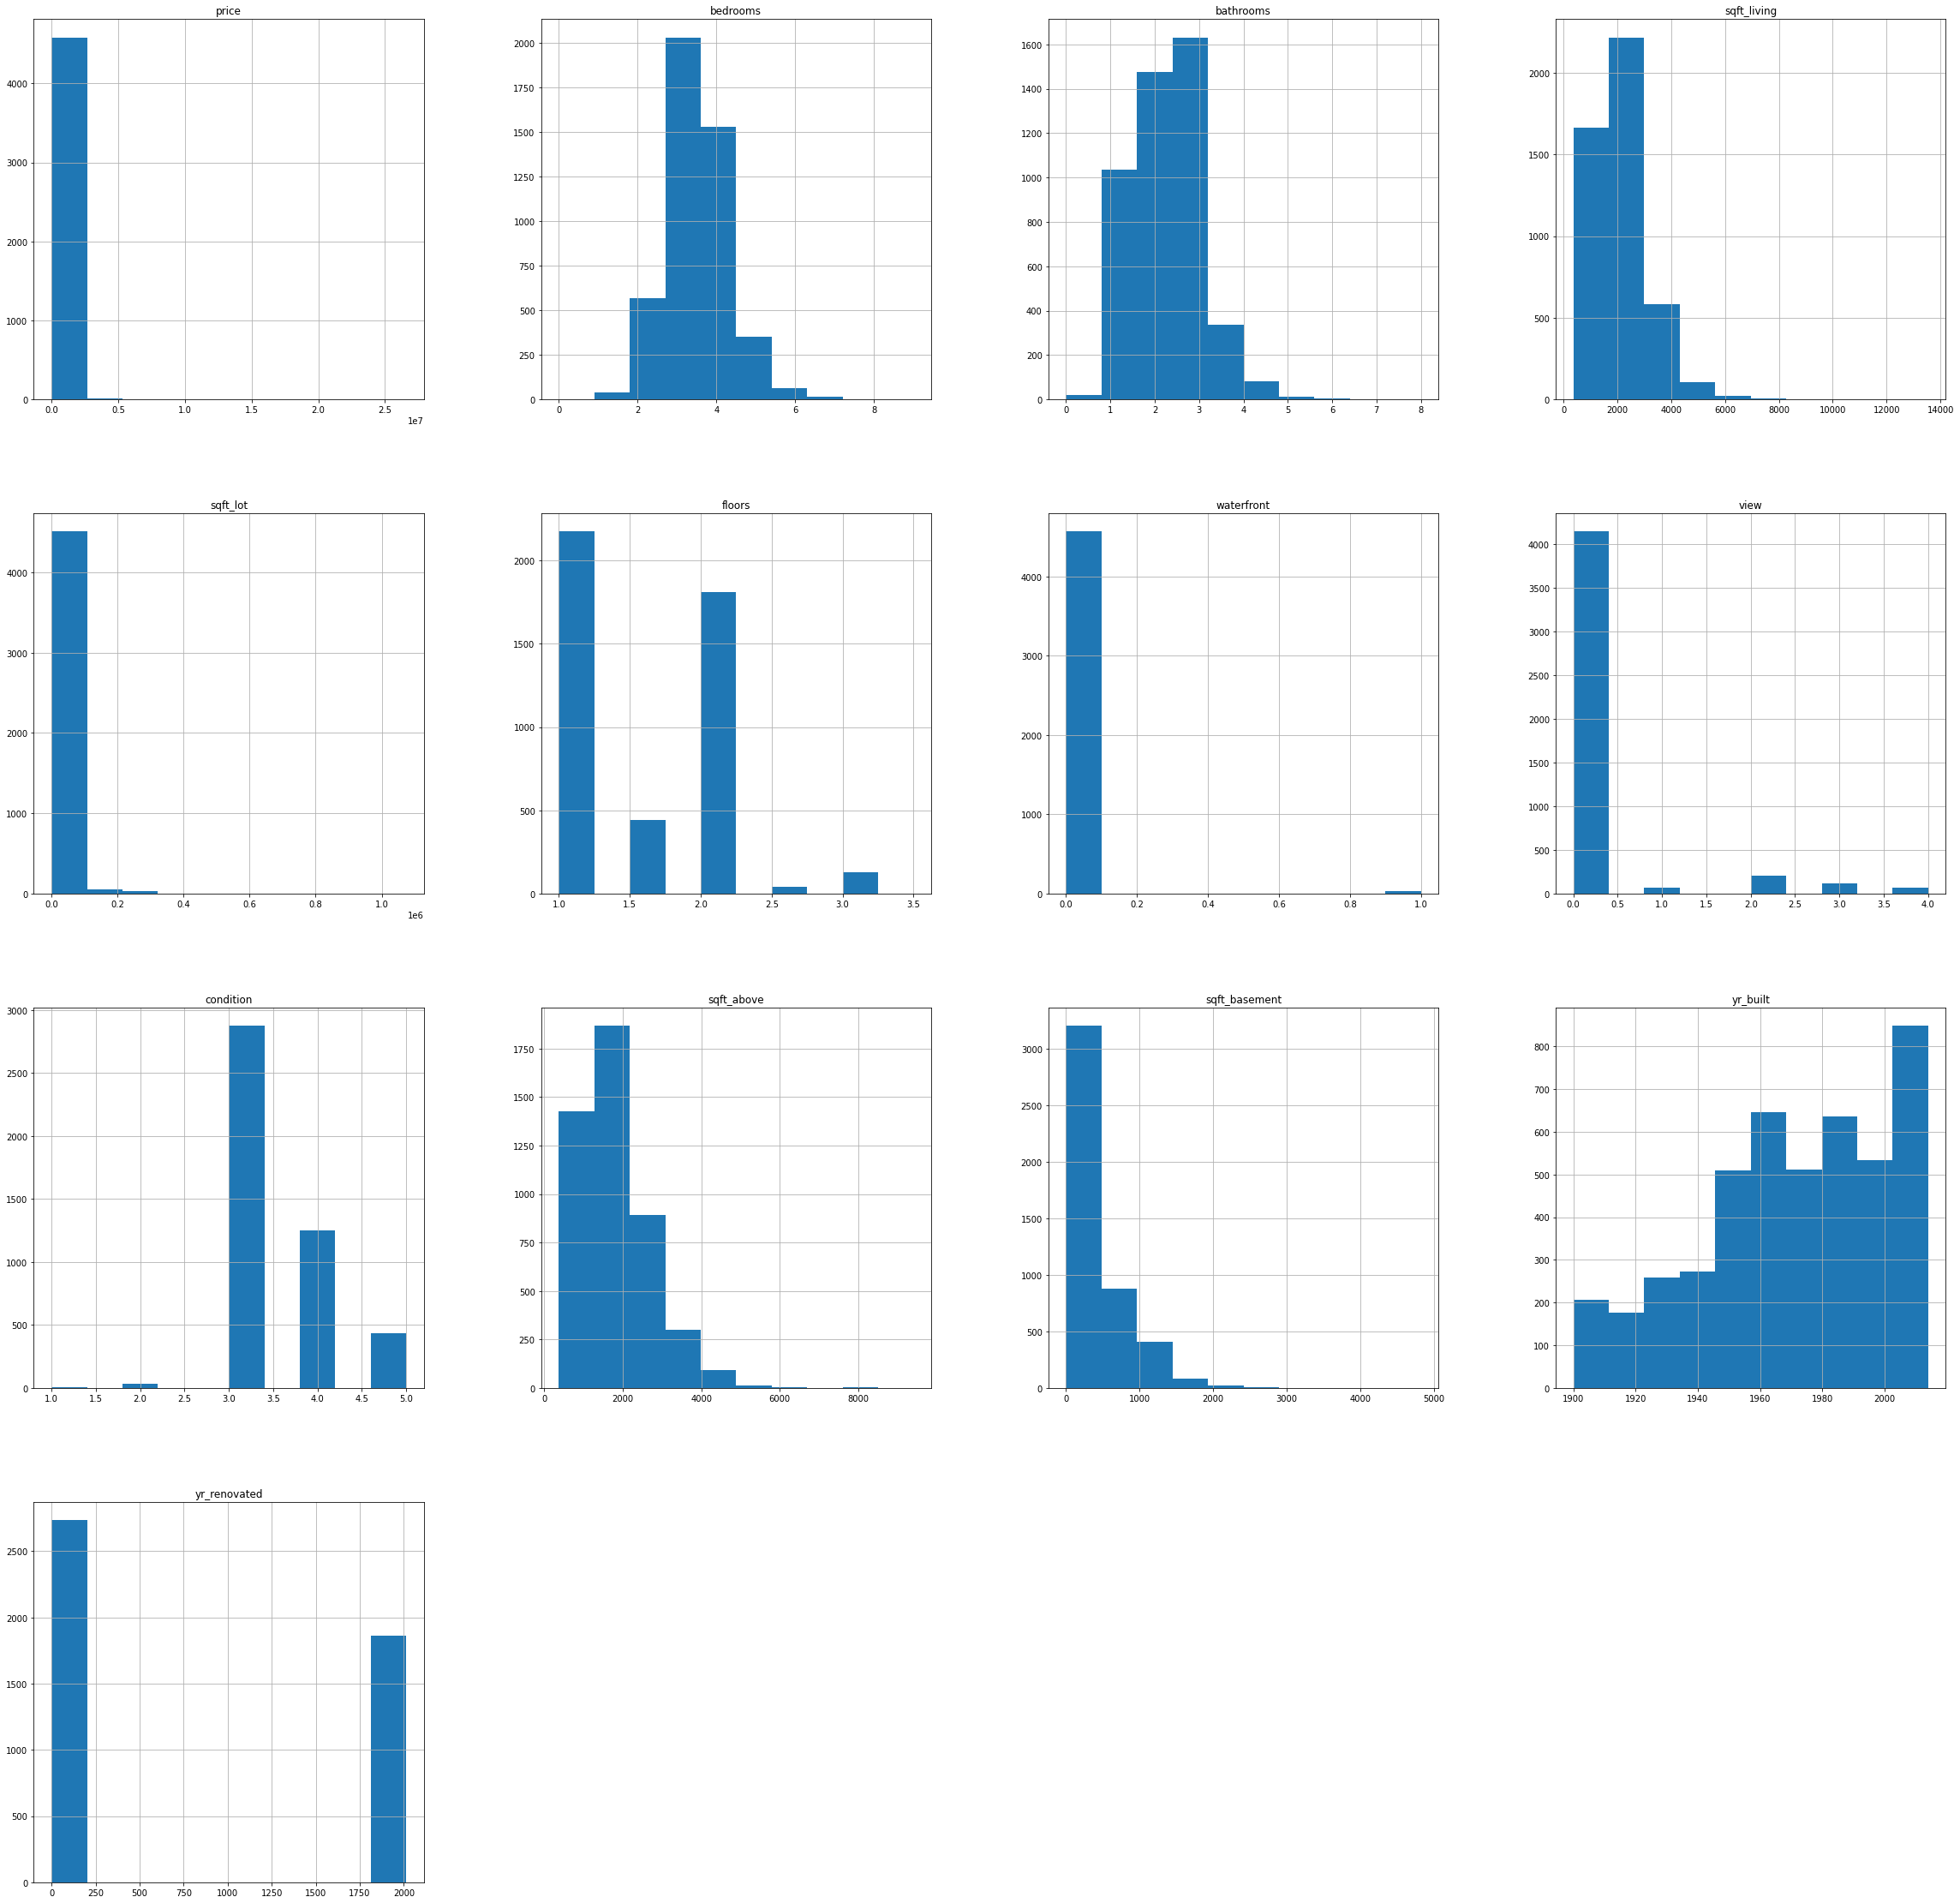

In [ ]:
#veremos distribuciones para recopilar mas información útil para nuestro analysis 
df.hist(figsize = (40, 40))
plt.show()


Ahora me gustaria ver mejor la distribucion tambien de la variable sqft_lot, debido a que el grafico obtenido no es muy informativo

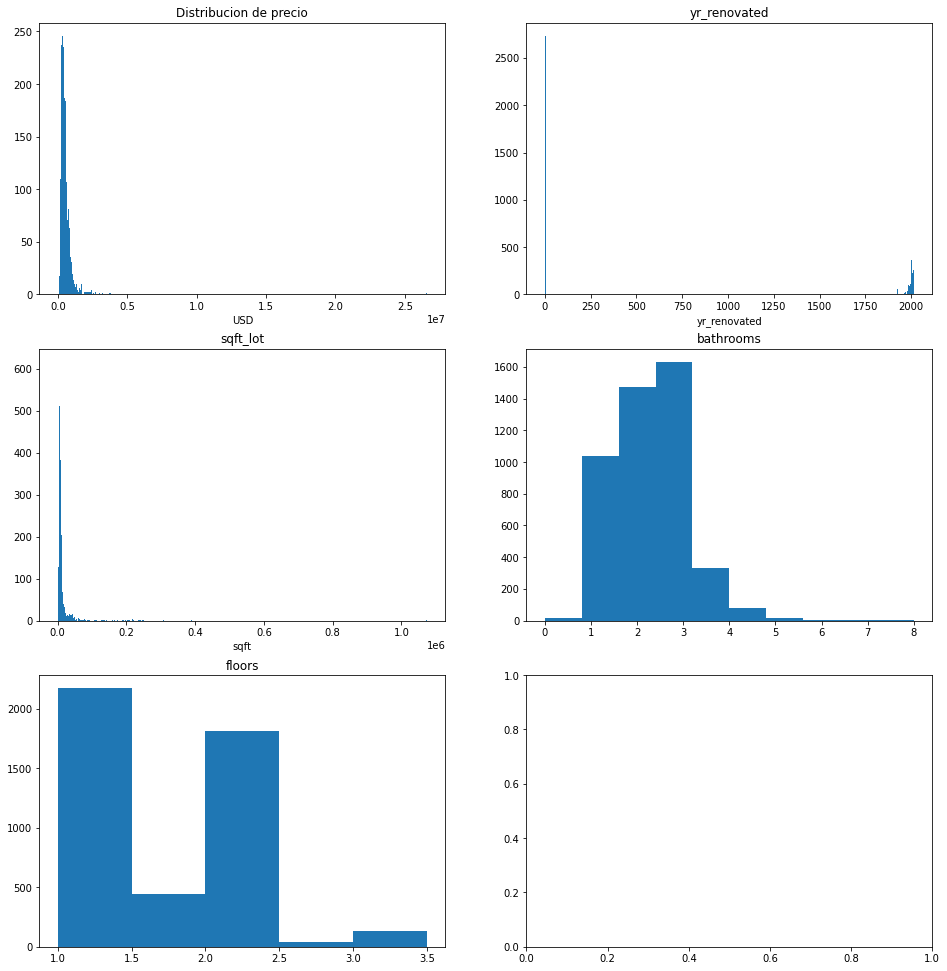

In [ ]:
#hecho un vistazo a distribucion de columnas sospechosas (definidas anteriormente) mas de cerca
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize=(16,17)) 
#alternativa mas simple de sacar histogramas de columnas cuantitativas en una sola figura es df.hist(figsize = (10,10) )

ax1.hist(df['price'], bins = np.linspace(df['price'].min(), df['price'].max(), 1000))
ax2.hist(df['yr_renovated'], bins = 500)
ax3.hist(df['sqft_lot'], bins = np.linspace(df['sqft_lot'].min(), df['sqft_lot'].max(), 1000))
ax4.hist(df['bathrooms'])
ax5.hist(df['floors'], bins = np.linspace(df['floors'].min(), df['floors'].max(), 6))

ax1.set_title('Distribucion de precio')
ax2.set_title('yr_renovated')
ax3.set_title('sqft_lot')
ax4.set_title('bathrooms')
ax5.set_title('floors')

ax1.set_xlabel('USD')#supongamos que esta expresado en USD
ax2.set_xlabel('yr_renovated')
ax3.set_xlabel('sqft') 
plt.show()
#figura ax6 esta vacía 

####df['floors']

In [ ]:
#no se visualiza bien cuantos valores floor == 3.5 existen en el dataset. Buscandolos:
df.loc[ df['floors']==3.5] 
#Estos resultados me hacen repensar el significado de la veriable "floors"
#Al parecer se trataba de la altura del apartamento expresada en cantidad de pisos que hay dentro. 
#En tal caso no hay nada extraño con los valores

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3398,2014-06-25 00:00:00,563500.0,3.0,2.5,1400,1312,3.5,0,0,3,1400,0,2007,0,3637 Phinney Ave N,Seattle,WA 98103,USA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

####df['sqft_lot']
Despues de experimentar con varias escalas de visualizacion de esta variable (cambianto parametro "bins"), seguia obteniendo un grafico con muchas entradas cercanas a zero. Esto y el hecho de que el minimo de esta variable no es zero sino un valor verosimile, me dice que puede tener un outlier my importante. Lo que voy a averiguar en el siguiente paso.

A la vez despues de investigar el sentido de este termino, creo que probablemente podria tener un valor 0, aunque no estoy segura. Lo que pude encontrar mas bien aplica a las casas en afueras de las siudades, no a los apartamentos dentro de los edificios altos urbanos: "In real estate terms, lot size indicates the size of the piece of land where the property is situated". Mientras tanto voy mantener la teoria de que 0 es un valor efectivo para la columna df['sqft_lot'].

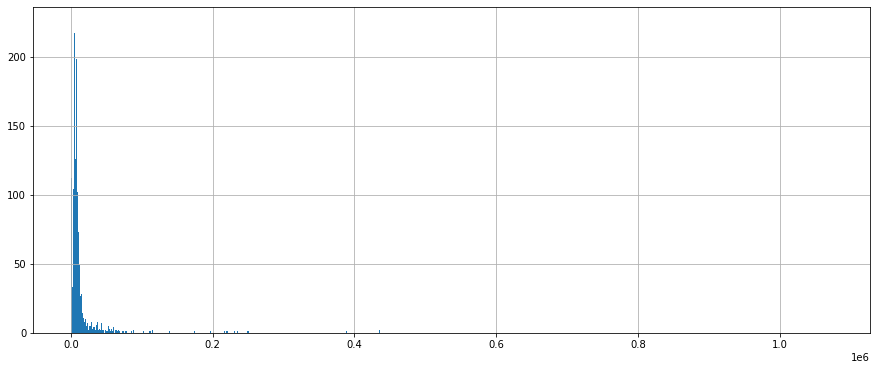

In [ ]:
#visualizacion para 3000 bins da mejor entendimiento de la situación 
df['sqft_lot'].hist(figsize = (15, 6), bins = 3000)
plt.show()

In [ ]:
#La diferencia entre median y mean.
print("Medina: ", df['sqft_lot'].median())
print("Promedio: ",df['sqft_lot'].mean())


Medina:  7683.0
Promedio:  14852.516086956522


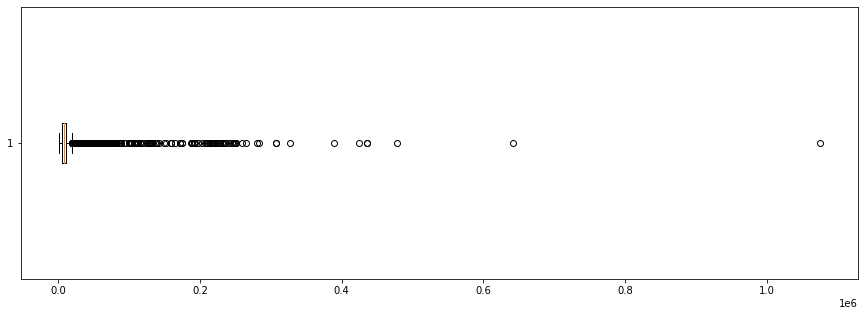

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(15,5)) 

ax.boxplot(df['sqft_lot'], vert = False)
plt.show()

Obviamente la columna tiene unos outlieres. Sin embargo, como no quisiera restarle informacion a mi modelo, lo dejo sin cambios hasta que no tenga obtenga primeros resultados del pronostico.

###df['yr_renovated']
Esta claro que esta variable tiene muchos valores zero que no pueden ser ciertos. Debo modificar esto antes de entrenar un modelo.

In [ ]:
df_original = df.copy() # para reusar en el caso de necesidad

In [ ]:
#cuantos zeros hay en la volumna?
df.loc[df["yr_renovated"] == 0, ['yr_renovated']].count()

yr_renovated    2735
dtype: int64

In [ ]:
#cantidad relativa de valores 0 es casi 60 % ((( 
df.loc[df['yr_renovated'] == 0, ['yr_renovated']].count()/df['yr_renovated'].count()

yr_renovated    0.594565
dtype: float64

In [ ]:
#No voy a excluir 60% de filas desde mi data set
#valor mediano de años que me resultara sin los zeros:
median_yr_renovated = df.loc[df['yr_renovated'] != 0, ['yr_renovated']].median()
median_yr_renovated[0]

2001.0

In [ ]:
#sustitución de zeros por el valor mediano
df.loc[df["yr_renovated"] == 0, "yr_renovated" ] = median_yr_renovated[0]
df["yr_renovated"].head()

0    2005
1    2001
2    2001
3    2001
4    1992
Name: yr_renovated, dtype: int64

In [ ]:
df.loc[df["yr_renovated"] == 0, ['yr_renovated']].count() #verificacion de cuantas quedan con valor 0?

yr_renovated    0
dtype: int64

In [ ]:
#hay casos de yr_renovated < yr_built?
df.loc[df["yr_renovated"] < df["yr_built"], ["yr_renovated"]].count()

yr_renovated    910
dtype: int64

In [ ]:
#muestras de tales casos:
df.loc[df["yr_renovated"] < df["yr_built"], ["yr_built", "yr_renovated"]].head() 
#ahora surge un problema - por cual valor debo cambiar estos 910 casos. 

,yr_built,yr_renovated
22,2005,2001
31,2004,2003
33,2014,2001
57,2006,2001
58,2008,2001


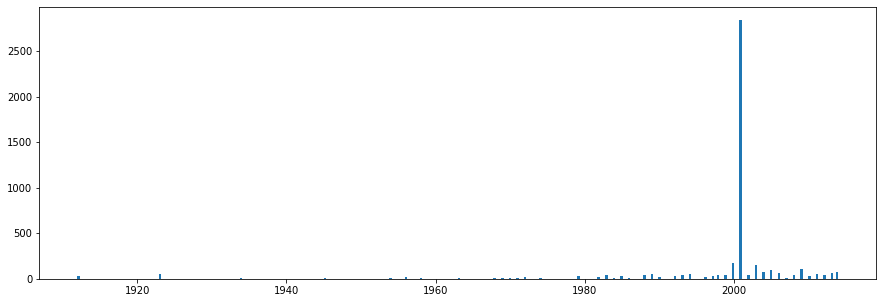

Mediana nueva de 'yr_renovated':  2001.0
Mediana original de 'yr_renovated':  0.0


In [ ]:
#como cambio la distribucion despues de sustitucion de zeros?
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(15,5)) 

ax.hist(df["yr_renovated"], bins = 300)
plt.show()
#sigue teniendo un pico que no puede ser real. Pero la mediana ya es 2001
print ("Mediana nueva de 'yr_renovated': ", df["yr_renovated"].median())
print ("Mediana original de 'yr_renovated': ", df_original["yr_renovated"].median())


In [ ]:
#Se podria  mejorar la calidad de datos en esta columna?
#Creando una columna con resta yr_renavated - yr_built. Sabemos que tendrá 910 resultadas menores a zero.
df["yrs_before_renew"] = df["yr_renovated"] - df["yr_built"]
df.loc[df["yrs_before_renew"]<0, "yrs_before_renew"].count()
print ("Entradas de yr_renavated que DESPUÉS de sustitucion siguen siendo menores al yr_built: ", df.loc[df["yrs_before_renew"]<0, "yrs_before_renew"].count()
)

Entradas de yr_renavated que DESPUÉS de sustitucion siguen siendo menores al yr_built:  910


In [ ]:
#Lo mismo para df_original
df_original["yrs_before_renew"] = df_original["yr_renovated"] - df_original["yr_built"]
df_original.loc[df_original["yrs_before_renew"]<0, "yrs_before_renew"].count()
print ("Entradas de yr_renavated que ANTES de sustitucion siguen siendo menores al yr_built: ", df_original.loc[df_original["yrs_before_renew"]<0, "yrs_before_renew"].count()
)

Entradas de yr_renavated que ANTES de sustitucion siguen siendo menores al yr_built:  2930


In [ ]:
#Nuevo df con resultados adecuados, es decir, solo con filas, donde "yrs_before_renew">0
df_yrs_to_renew = df_original[df_original["yrs_before_renew"]>0] 
#chequeando columnas y valores NaN
df_yrs_to_renew.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
street              0
city                0
statezip            0
country             0
yrs_before_renew    0
dtype: int64

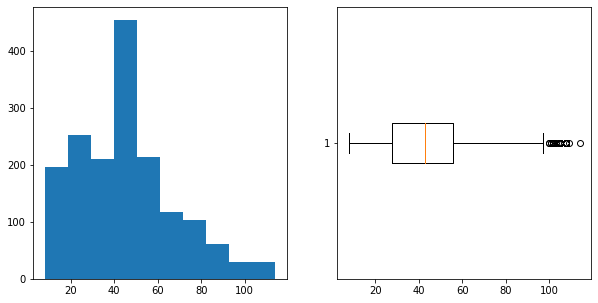

In [ ]:
#Exploracion de las estadisticas de la columna yrs_before_renew 
#para posiblemente calcular yr_renovated y sustituir valores en los 910 entradas erróneas.
df_yrs_to_renew = df_yrs_to_renew["yrs_before_renew"]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.hist(df_yrs_to_renew, bins = 10)
ax2.boxplot(df_yrs_to_renew, vert = False)
plt.show()
#La distribucion no es "normal estandar". Existen algunos outliers
#Siempre es mejor usar la mediana

In [ ]:
#Mediana
df_yrs_to_renew.median() 
#43 años. Pero si agrego este numero al yr_build para calcular el yr_renovated, 
#podria distorcionar nuestros resultados.
#entre las dos columnas debe haber una correlacion y se podria predecir la segunda que buscamos, 
#pero en este caso aumentare el grado de correlacion y no me aportara ninguna informacion adicional esta columna. 

#No seguire con la idea de calcular yr_renovated. 
#Si en los valores existe una correlacion, se podrá excluir yr_renovated en su totalidad

43.0

In [ ]:
#correlacion entre año de renovacion y precio 
#en datos validos originales ANTES de sustitucion
df_original[df_original["yrs_before_renew"]>0]["yr_renovated"].corr(df_original[df_original["yrs_before_renew"]>0]["price"])

-0.018208272043063897

In [ ]:
#correlacion entre año de renovacion y precio 
#en datos validos DESPUÉS de sustitucion
df[df["yrs_before_renew"]>0]["yr_renovated"].corr(df[df["yrs_before_renew"]>0]["price"])

-0.006572930415463931

In [ ]:
#correlacion pyr_renovated y yr_built, en datos validos originales DESPUÉS de sustitucion
#solo usare filas donde df["yrs_before_renew"] es > a 0, debido a que los datos originales no son correctos entonces
df[df["yrs_before_renew"]>0]["yr_renovated"].corr(df[df["yrs_before_renew"]>0]["yr_built"])
# No es recomendable excluir en esta etapa, debido a que el coeficiente es menor a 0,5.

0.2803858971150502

In [ ]:
#catidad de datos invalidos - 910
excluir_yrs = df[df["yrs_before_renew"]<0]["yrs_before_renew"].count() 
excluir_yrs


910

In [ ]:
#Voy guardar calculos del % de las filas excluidas
def exclusion(num_excluir):
  #num_excluded - es un numero de filas excluidas en una etapa de investigacion, se sumaran al numero de excluidas anteriormente.
  filas_excluidas = (0 + num_excluir)/df.shape[0]
  percentaje = round(filas_excluidas*100, 2)
  print(f"Porcentaje acumulado de las filas a excluir es de {percentaje}%") 
exclusion(excluir_yrs)


Porcentaje acumulado de las filas a excluir es de 19.78%


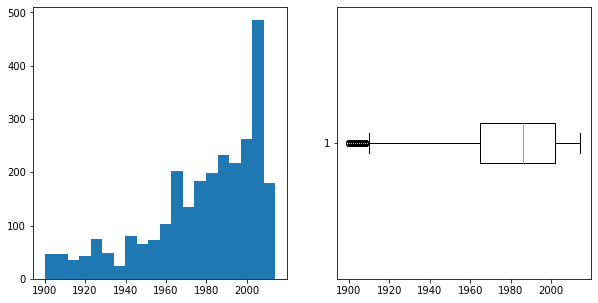

In [ ]:
#son las viviendas con yr_renovated equivalente a zero en general vivendas nuevas?
yr_built_0_renov = df_original.loc[df_original["yr_renovated"] == 0, "yr_built"]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.hist(yr_built_0_renov, bins = 20)
ax2.boxplot(yr_built_0_renov, vert = False)
plt.show()
#se visualizan viviendas de un rango amplio de año de construcción con "yr_renovated" == 0

In [ ]:
yr_built_0_renov.median() 

1986.0

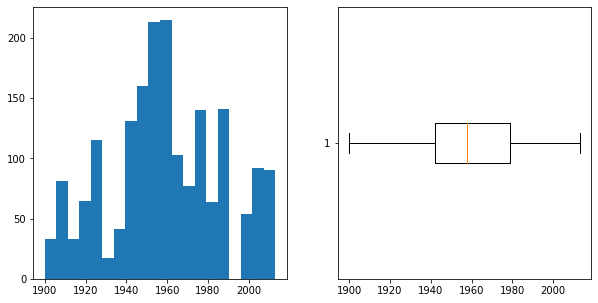

In [ ]:
#distribucion de año de construccion de viviendas con yr_renovated !=0
yr_built_renov = df_original.loc[df_original["yr_renovated"] != 0, "yr_built"]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.hist(yr_built_renov, bins = 20)
ax2.boxplot(yr_built_renov, vert = False)
plt.show()

In [ ]:
print("Medianas de años de construccion 'yr_built': \n donde yr_renovated = 0:", yr_built_0_renov.median(), 
      "\n donde yr_renovated != 0:", yr_built_renov.median())


Medianas de años de construccion 'yr_built': 
 donde yr_renovated = 0: 1986.0 
 donde yr_renovated != 0: 1958.0


En conclusion, en general, las viviendas con yr_renovated = 0 son mas nuevas, sin embargo viendo la distribuicion, contienen muchas viviendas antiguas y viejas. 
Creo que en esta situacion es dificil definir que es mejor:
* eliminar la columna yr_renovated.
* eliminar las filas donde yr_renovated = 0 .
* sustituir valores invalidos por una mediana de datos validos (a base de df_origin[yrs_before_renew] => 0 o de df_original["yr_renovated"] != 0).
* sustituirlos por valores coorespondientes en de la columna yr_built.

La ultima parece ser la que contiene mas informacion real que otras estrategias en cuanto a variacion, frecuencia de datos y tambien equvalencia del rango de números (ambas columnas van desde 1900 y terminan en los 2014.)

In [ ]:
#Seguiré con la opcion 4 - sustituir por los valores correspondiendes de la columna yr_built
#trabajare con el nombre clasico de la variable de mi DF.
df = df_original.drop("yrs_before_renew", 1)
df.head(3)

<ipython-input-40-cf80e0458dec>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df_original.drop("yrs_before_renew", 1)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [ ]:
#sustituir por los valores correspondiendes de yr_built
df.loc[df["yr_renovated"] < df["yr_built"], ["yr_renovated"]] = df["yr_built"]
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,2009,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,1974,5148 S Creston St,Seattle,WA 98178,USA


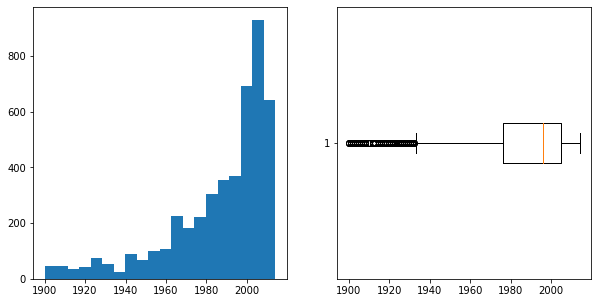

In [ ]:
#nueva distribucion "yr_renovated"

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
ax1.hist(df["yr_renovated"], bins = 20)
ax2.boxplot(df["yr_renovated"], vert = False)
plt.show()

In [ ]:
#nueva mediana
df["yr_renovated"].median() 

1996.0

In [ ]:
#mediana anterior
df_original.loc[df_original["yr_renovated"] > df_original["yr_built"] , ["yr_renovated"]].median()[0]

2001.0

In [ ]:
min = df_original.loc[df_original['yr_renovated'] > df_original['yr_built'] , ['yr_renovated']].min()[0]
max = df_original.loc[df_original['yr_renovated'] > df_original['yr_built'] , ['yr_renovated']].max()[0]


In [ ]:
print(f"EL rango de valores original de 'yr_renovated': {max - min}")
print(f"EL rango de valores nuevo: { df['yr_renovated'].max() - df['yr_renovated'].min()}")

EL rango de valores original de 'yr_renovated': 80
EL rango de valores nuevo: 114


In [ ]:
#El rango aumento por 34 años, lo que es cercano a 50% del nivel inicial, mientras que la mediana se ha bajado por 5 años. 
#no es un criterio necesariamente preciso pero me da la idea que quizas el cambio no ha sido catastrófico.
(df['yr_renovated'].max() - df['yr_renovated'].min()) - (max - min) 

34

###df['price']

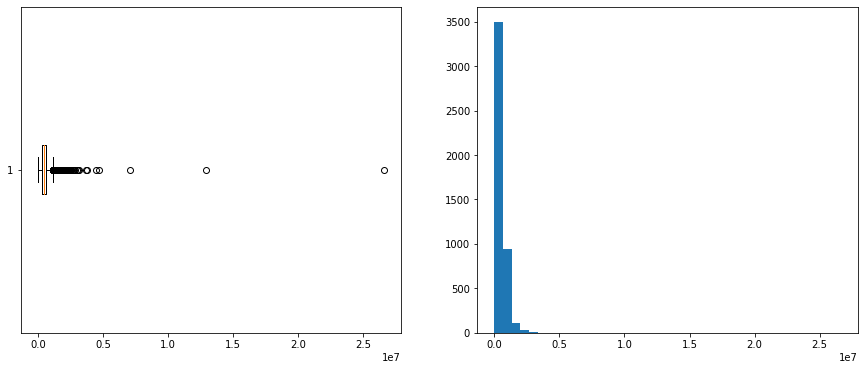

In [ ]:
#visualizacion de histograma con 3000 bins y un boxplot da mejor entendimiento de la situación 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
ax1.boxplot(df['price'], vert = False)
ax2.hist(df['price'], bins = 40)

plt.show()

In [ ]:
#Cuantas valores 0 hay?
df.loc[df['price'] == 0, 'price' ].count()

49

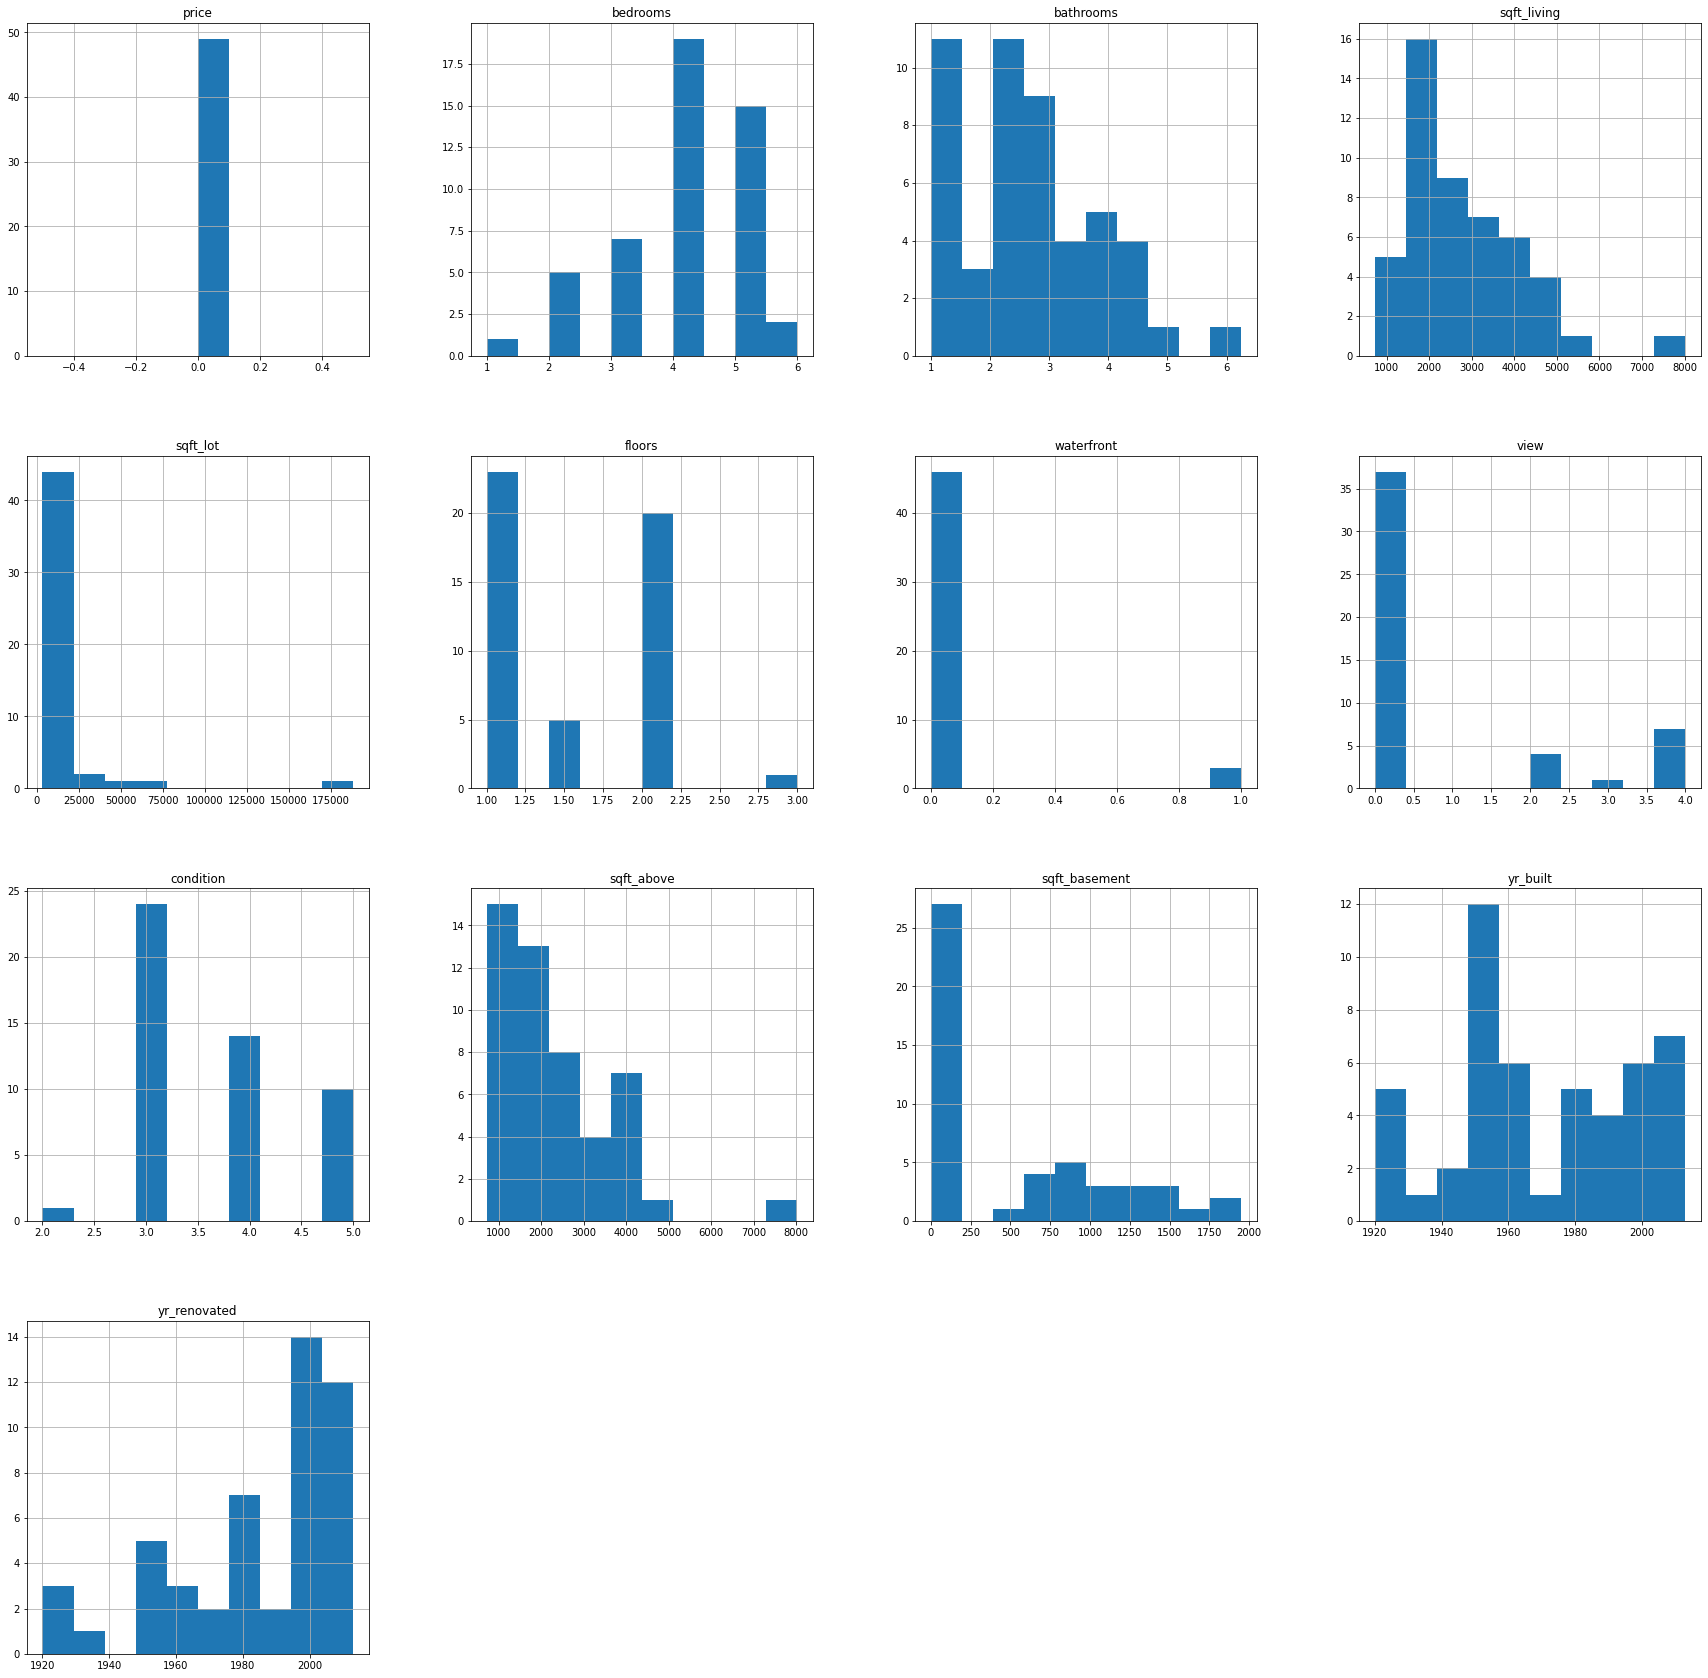

In [ ]:
#Parcen validas las distribuciones de otras variables correspondientes?
df.loc[df['price'] == 0 ].hist(figsize = (30,30))
plt.show()

In [ ]:
#Aunque parecen validos los demas, eliminare las filas donde "price" == 0 - no pueden ser valios y dificultan el analisis
df = df.loc[df['price'] != 0 ]

In [ ]:
df.loc[df['price'] == 0, 'price' ].count() #cuantos zeros hay ahora?

0

In [ ]:
df.info() #aqui la orden de la indexacion ha sido destruida

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [ ]:
df.reset_index(drop=True, inplace = True) #recuperando indexacion con una orden normal

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4551 entries, 0 to 4550
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   float64
 3   bathrooms      4551 non-null   float64
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   float64
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   object 
 15  city           4551 non-null   object 
 16  statezip       4551 non-null   object 
 17  country        4551 non-null   object 
dtypes: float

In [ ]:
df.head(3) #control visual

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [ ]:
df['price'].sort_values(ascending=False) #lograre ver los valores extremos?

4350    26590000.0
4346    12899000.0
2286     7062500.0
2654     4668000.0
2761     4489000.0
           ...    
4396       83300.0
4392       83300.0
1587       83000.0
1219       80000.0
4351        7800.0
Name: price, Length: 4551, dtype: float64

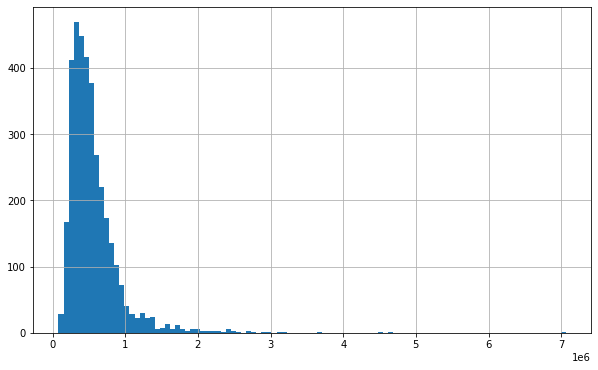

In [ ]:
#distrubucion de los valores mas frecuentes
df['price'].drop(df.tail(1000).index,inplace = False).hist(figsize = (10, 6), bins = 100) 

###df['bathrooms'] y df['badrooms']
**"bathrooms"** - la columna no puede tener 0 baños en el caso de si se trata de los apartamentos o casas residenciales. Voy a prestar atencion a la distribucion de esta variable.

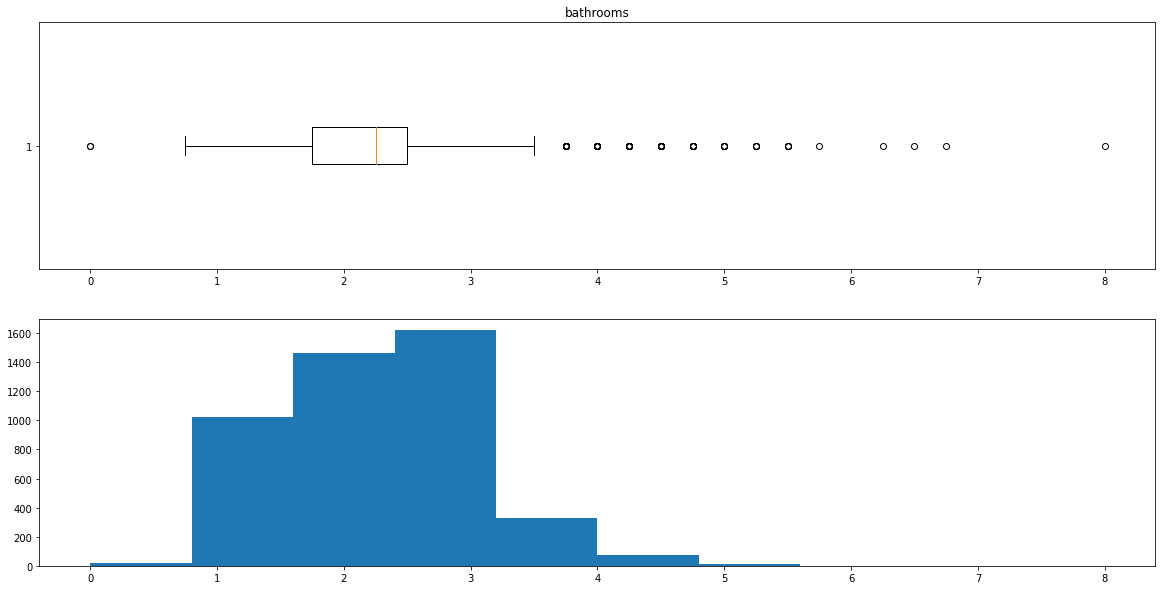

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(20,10), ) 

axs[0].boxplot(df['bathrooms'], vert = False)
axs[1].hist(df['bathrooms'])

axs[0].set_title('bathrooms')

plt.show()

In [ ]:
#El % de los valores invalidos , es decir equivalentes a 0
df.loc[df['bathrooms'] == 0, 'bathrooms' ].count()

2

In [ ]:
df.loc[df['bathrooms'] == 0 ] #visualizamos las dos filas. 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [ ]:
#Councide con los valores 0 en la columna "bedrooms".
df.loc[df['bedrooms'] == 0, 'bedrooms' ].count()

2

In [ ]:
df.shape

(4551, 18)

In [ ]:
exclusion(2) #aplicando la formula para expresar la cantidad de datos a excluir en %

Porcentaje acumulado de las filas a excluir es de 0.04%


In [ ]:
#como son solo 2 enradas invalidas, los vamos a excluir del DF
df.loc[df['bathrooms'] != 0 ].count()#verificando columnas y cantidad de valores en el df resultante

date             4549
price            4549
bedrooms         4549
bathrooms        4549
sqft_living      4549
sqft_lot         4549
floors           4549
waterfront       4549
view             4549
condition        4549
sqft_above       4549
sqft_basement    4549
yr_built         4549
yr_renovated     4549
street           4549
city             4549
statezip         4549
country          4549
dtype: int64

In [ ]:
df.loc[df['bathrooms'] != 0 ].head(3) #verifico visualizacion resultante

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [ ]:
df = df.loc[df['bathrooms'] != 0 ] #guardo el nuevo df

In [ ]:
df.reset_index(drop=True, inplace = True) #recuperando indexacion con una orden normal

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4549 non-null   object 
 1   price          4549 non-null   float64
 2   bedrooms       4549 non-null   float64
 3   bathrooms      4549 non-null   float64
 4   sqft_living    4549 non-null   int64  
 5   sqft_lot       4549 non-null   int64  
 6   floors         4549 non-null   float64
 7   waterfront     4549 non-null   int64  
 8   view           4549 non-null   int64  
 9   condition      4549 non-null   int64  
 10  sqft_above     4549 non-null   int64  
 11  sqft_basement  4549 non-null   int64  
 12  yr_built       4549 non-null   int64  
 13  yr_renovated   4549 non-null   int64  
 14  street         4549 non-null   object 
 15  city           4549 non-null   object 
 16  statezip       4549 non-null   object 
 17  country        4549 non-null   object 
dtypes: float

### df["view"] y df['condition']
**"view"** - tiene poco sentido que la "vista" sea 0. Se deben checquear la distribucion.


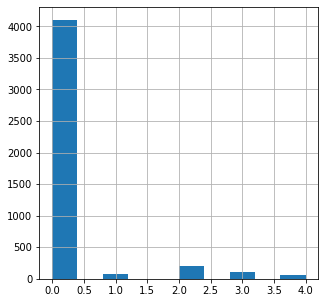

In [ ]:
df['view'].hist(figsize=(5,5))
plt.show()

In [ ]:
#Esta variable categorica esta representanto la calidad de la vista, en la escala peor - mejor. 
#Otras variables categoricas que rangos tienen?
print(f"Valores unicos en la columna 'view': {df['view'].nunique()}. Rango de {df['view'].min()} - {df['view'].max()}")
print(f"Valores unicos en la columna 'waterfront': {df['waterfront'].nunique()}. Rango de {df['waterfront'].min()} - {df['waterfront'].max()}")
print(f"Valores unicos en la columna 'condition': {df['condition'].nunique()}. Rango de {df['condition'].min()} - {df['condition'].max()}")


Valores unicos en la columna 'view': 5. Rango de 0 - 4
Valores unicos en la columna 'waterfront': 2. Rango de 0 - 1
Valores unicos en la columna 'condition': 5. Rango de 1 - 5


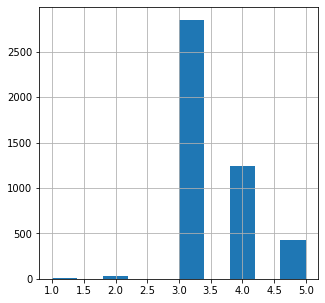

In [ ]:
#variable "condition" se puede llevar al mismo rango que "view" para mejor aprendizaje del modelo.
df['condition'].hist(figsize=(5,5)) #veamos la distribucion
plt.show()

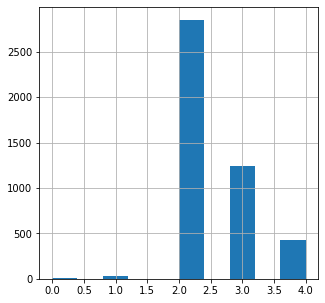

In [ ]:
re_coding = {1:0,
            2:1,
            3:2,
            4:3,
            5:4}
df['condition'].replace(re_coding).hist(figsize = (5,5)) #previsualizando los resultados


In [ ]:
df.loc[df['condition']].replace(re_coding, inplace = True) #ejecutando sustitución
 

In [ ]:
#verificando el resultado
print(f"Valores unicos en la columna 'condition': {df['condition'].nunique()}. Rango de {df['condition'].min()} - {df['condition'].max()}")


Valores unicos en la columna 'condition': 5. Rango de 1 - 5


###**Columnas categoricas**
date street	city	statezip	country

In [ ]:
df.drop("date", 1, inplace = True) #quitando la columna "date" porque no la vamos a usar

<ipython-input-76-270fb72bc001>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop("date", 1, inplace = True) #quitando la columna "date" porque no la vamos a usar


In [ ]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [ ]:
#tenemos valores repetitivos?
#no, casi todos son unicos
print("Valores unicos: ", df["street"].nunique()) 
print("Numero total de valores: ",df["street"].count())

Valores unicos:  4474
Numero total de valores:  4549


In [ ]:
# la voy a excluir, tenemos la colimna "statezip".
df.drop("street", 1, inplace = True) 

<ipython-input-79-e4c54ce62c40>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop("street", 1, inplace = True)


In [ ]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,1921,Seattle,WA 98119,USA
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,1966,Kent,WA 98042,USA


In [ ]:
#tenemos valores repetitivos?
#no, casi toos son unicos
print("Valores unicos: ", df["statezip"].nunique()) 
print("Numero total de valores: ",df["statezip"].count()) 

Valores unicos:  77
Numero total de valores:  4549


In [ ]:
#No me gusta usar One Hot Encoder debido a que aumentara la cantidad de variables a 77 
#Segun lo que consulte in la web, aqui podrian resultar bien los BinaryEncoder, Hashing Trick y agrupacion por la mayor influencia a la target Y.

In [ ]:
#Mientras tanto usare BinaryEncoder
#Descargo e Importo liberia que requiere menos codigo como si usara skitlearn
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 KB 7.1 MB/s eta 0:00:00


In [ ]:
#importacion y aplicacion del metodo
from category_encoders import BinaryEncoder
df = BinaryEncoder(cols=['statezip']).fit(df).transform(df)

In [ ]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,city,statezip_0,statezip_1,statezip_2,statezip_3,statezip_4,statezip_5,statezip_6,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,...,2005,Shoreline,0,0,0,0,0,0,1,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,...,1921,Seattle,0,0,0,0,0,1,0,USA
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,...,1966,Kent,0,0,0,0,0,1,1,USA


In [ ]:
df.columns #control de columnas

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip_0', 'statezip_1',
       'statezip_2', 'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6',
       'country'],
      dtype='object')

In [ ]:
df["city"].nunique() #44 valores unicas

44

In [ ]:
#igualmente usamos el metodo de BinaryEncoder para la columna "City"
df = BinaryEncoder(cols=['city']).fit(df).transform(df)

In [ ]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_4,city_5,statezip_0,statezip_1,statezip_2,statezip_3,statezip_4,statezip_5,statezip_6,country
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,...,0,1,0,0,0,0,0,0,1,USA
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,...,1,0,0,0,0,0,0,1,0,USA
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,...,1,1,0,0,0,0,0,1,1,USA


In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6', 'country'],
      dtype='object')

In [ ]:
df["country"].nunique() #valores unicos en la columna 

1

In [ ]:
#eliminamos columna "country"
df.drop(columns = "country", inplace = True)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_3,city_4,city_5,statezip_0,statezip_1,statezip_2,statezip_3,statezip_4,statezip_5,statezip_6
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,1
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,1,0
2,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,...,0,1,1,0,0,0,0,0,1,1


##**Normalización**

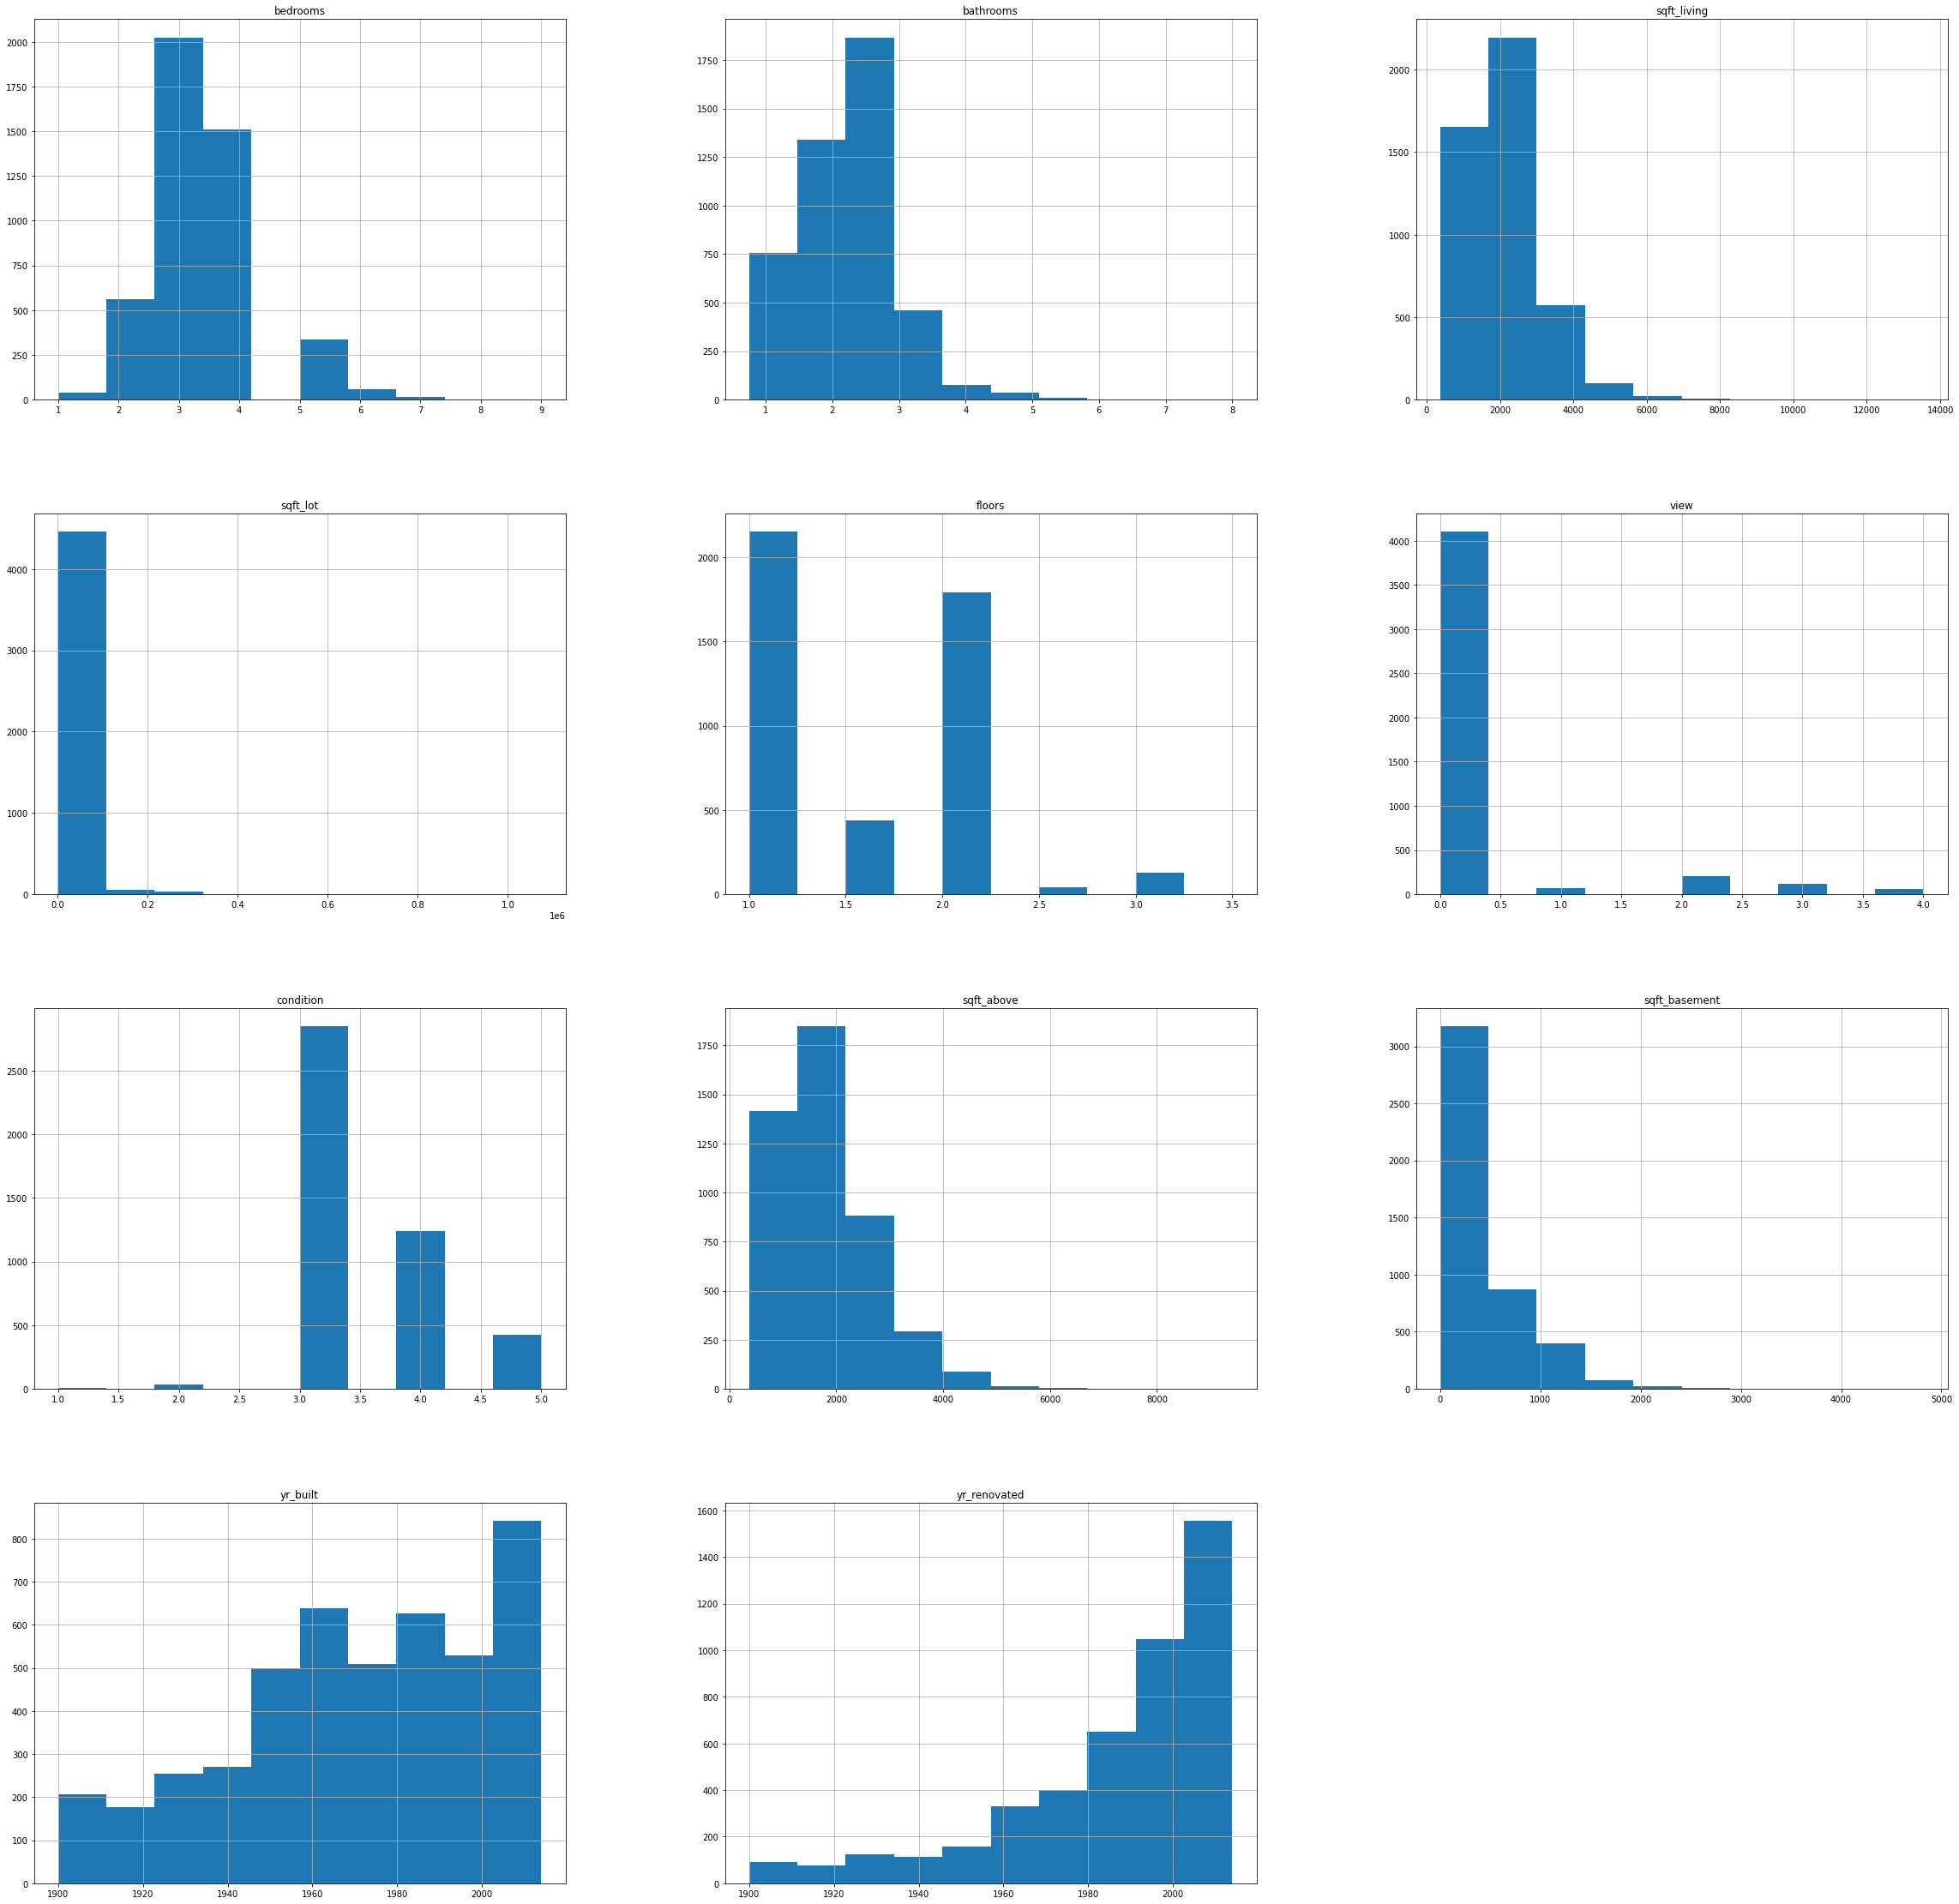

In [ ]:
#verificamos nuevas distribuciones para seleccionar un metodo de normalizacion
cols_to_norm = [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']# Determinacion de valores cuantitavos, candidados a normalizacion.
df[cols_to_norm].hist( figsize = (40, 40))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
#Separacion en variables independientes y dependientes
x = df.drop("price", 1, inplace = False)
y = df["price"]
x.columns

<ipython-input-95-ab490b0ab95a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop("price", 1, inplace = False)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

In [ ]:
# tengamos cerca los nombres de columnas a normalizar y las bianrias.
cols_to_norm
binary_cols = ['city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5','statezip_0', 'statezip_1',
       'statezip_2', 'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6', 'waterfront']

###Aplicación de RobustScaler()


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [ ]:
#Transformando x , y. 
scaled_x = x[cols_to_norm].copy()
x_binary = x[binary_cols].copy()
y = y.to_numpy().reshape(-1, 1) #convercion a un np array 
scaled_x = scaler.fit_transform(scaled_x) #devuelve np array
scaled_y = scaler.fit_transform(y)#devuelve np array

In [ ]:
#devolviendo formato PD 
scaled_x_df = pd.DataFrame(scaled_x, columns = cols_to_norm)
scaled_y_df = pd.DataFrame(scaled_y, columns = ["price"]) 
y = scaled_y_df

In [ ]:
y.describe() #se ha transformado la ¨y¨? 

,price
count,4549.000000
mean,0.279498
std,1.701543
min,-1.379602
25%,-0.419131
50%,0.000000
75%,0.580869
max,78.832227


In [ ]:
y.head()

,price
0,-0.458660
1,5.790585
2,-0.371153
3,-0.135788
4,0.256488


In [ ]:
df['price'].head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [ ]:
df['price'].drop(df['price'].nlargest(50).index,inplace = False)

0       313000.000000
2       342000.000000
3       420000.000000
4       550000.000000
5       490000.000000
            ...      
4544    308166.666667
4545    534333.333333
4546    416904.166667
4547    203400.000000
4548    220600.000000
Name: price, Length: 4499, dtype: float64

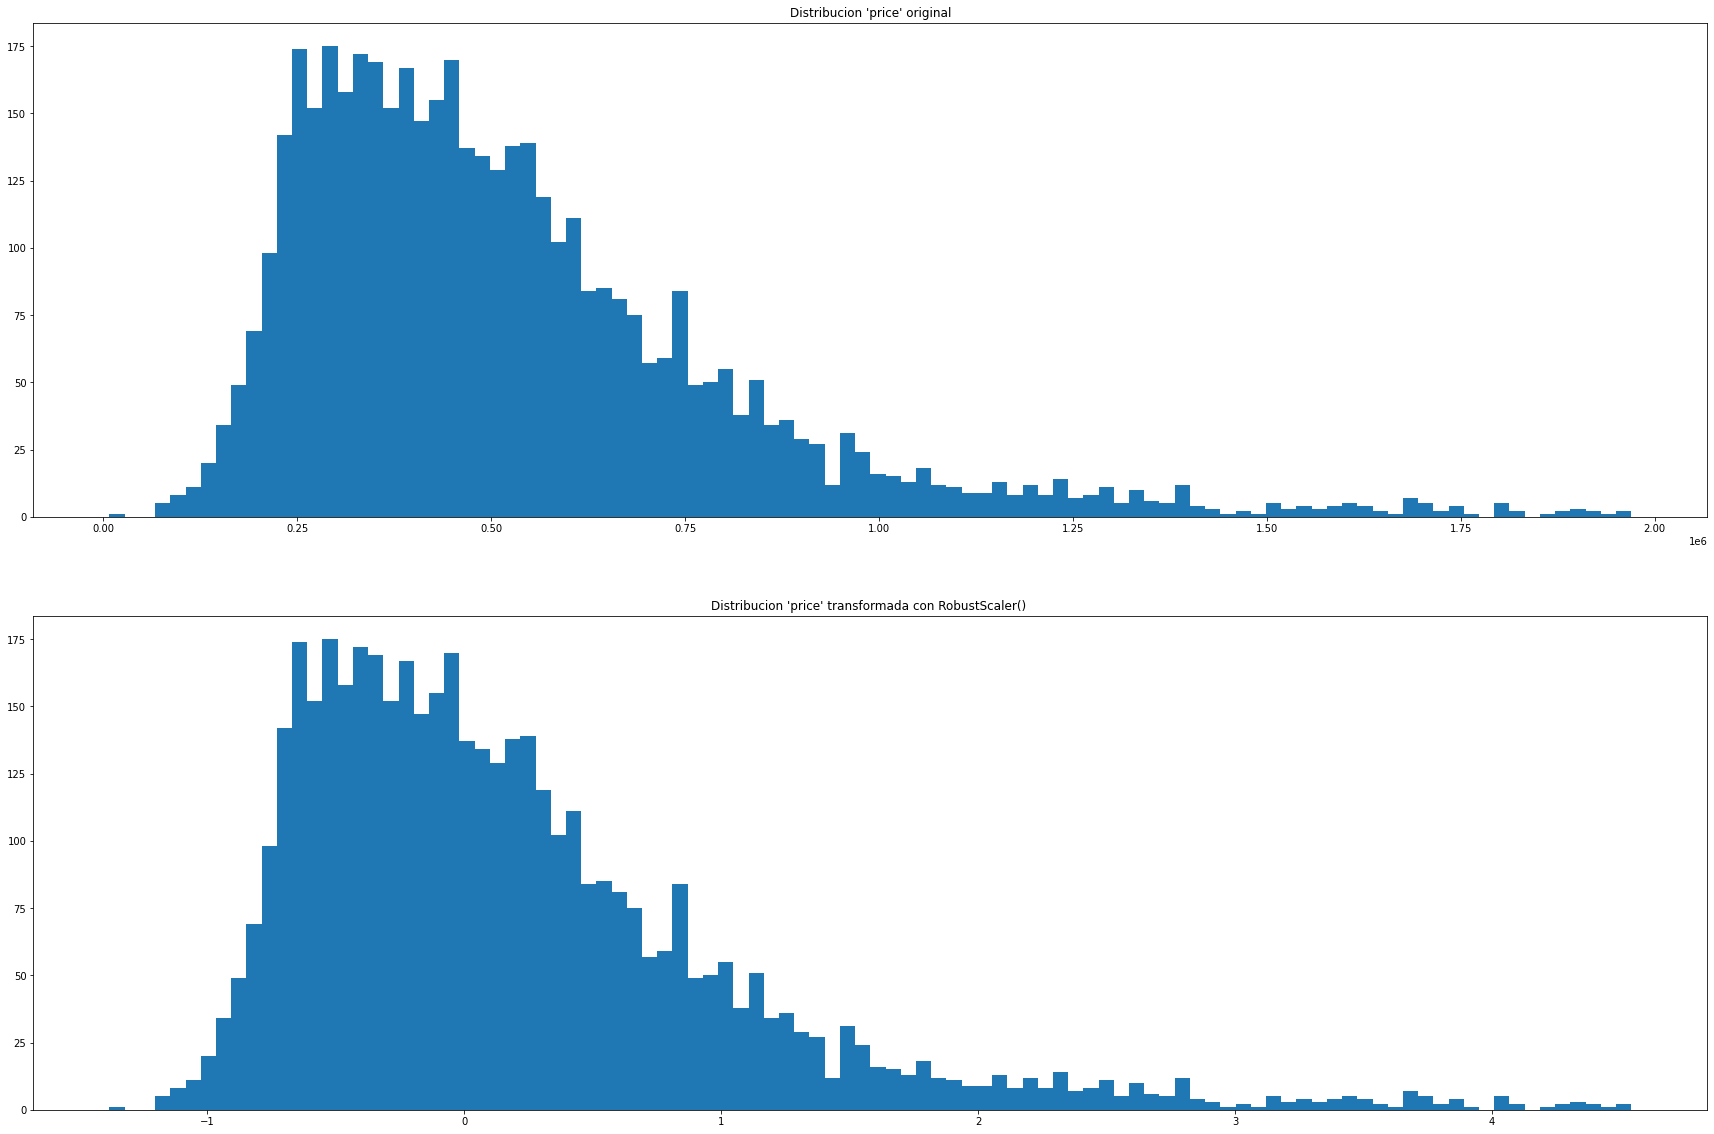

In [ ]:
#Distribucion nueva del y
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(30,20)) 

axs[0].hist(df['price'].drop(df['price'].nlargest(50).index,inplace = False), bins = 100) #quito los valores mas grandes
axs[0].set_title("Distribucion 'price' original")
axs[1].hist(y['price'].drop(df['price'].nlargest(50).index,inplace = False), bins = 100) #quito los valores mas grandes
axs[1].set_title("Distribucion 'price' transformada con RobustScaler() ")
plt.show()
#Como he quitado algunos de valores mas grandes, los graficos muestran tan solo una ditr. aproximada 

In [ ]:
# concatenando
scaled_x_all = pd.concat([scaled_x_df, x_binary], axis = 1)
#control de indexacion
print(scaled_x_df.index.max())
print(x[binary_cols].index.max())
print(scaled_x_all.index.max())
print(y.index.max())

4548
4548
4548
4548


In [ ]:
#regrabando la variable 
x = scaled_x_all

##**Exploración de correlación**

In [ ]:
#Concatenando para explorar correlaciones
xy = pd.concat([y,x], axis = 1)
xy.shape

(4549, 26)

In [ ]:
df_corr = xy.corr(method = "spearman") #primero creamos tabla de correlacion
df_corr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,...,city_4,city_5,statezip_0,statezip_1,statezip_2,statezip_3,statezip_4,statezip_5,statezip_6,waterfront
price,1.000000,0.360326,0.515487,0.655399,0.083857,0.326925,0.284922,0.030292,0.552366,0.247398,...,-0.189594,-0.158516,-0.206180,0.090328,0.001945,0.013993,-0.026200,0.002408,-0.227474,0.101294
bedrooms,0.360326,1.000000,0.537551,0.653294,0.238038,0.220373,0.094889,0.003546,0.535782,0.247376,...,-0.149931,0.062723,-0.089558,0.042085,0.011864,-0.032451,-0.011058,0.026253,-0.003522,-0.012259
bathrooms,0.515487,0.537551,1.000000,0.747532,0.089292,0.543439,0.162749,-0.165542,0.698062,0.187823,...,-0.145664,0.076183,-0.127498,0.077581,-0.016504,-0.032031,0.007486,0.055748,-0.034052,0.042835
sqft_living,0.655399,0.653294,0.747532,1.000000,0.323404,0.394604,0.244896,-0.066858,0.843267,0.323212,...,-0.232705,0.102408,-0.116426,0.096287,-0.014744,-0.044196,-0.008431,0.032306,-0.060461,0.061665
sqft_lot,0.083857,0.238038,0.089292,0.323404,1.000000,-0.207570,0.110214,0.091914,0.303846,0.022357,...,-0.361603,0.254425,-0.002473,0.039012,0.028660,-0.062464,-0.060532,-0.116428,0.096498,0.089457


In [ ]:
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(xy.corr(), dtype=np.bool))

<ipython-input-109-6f4505e7a85e>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(xy.corr(), dtype=np.bool))


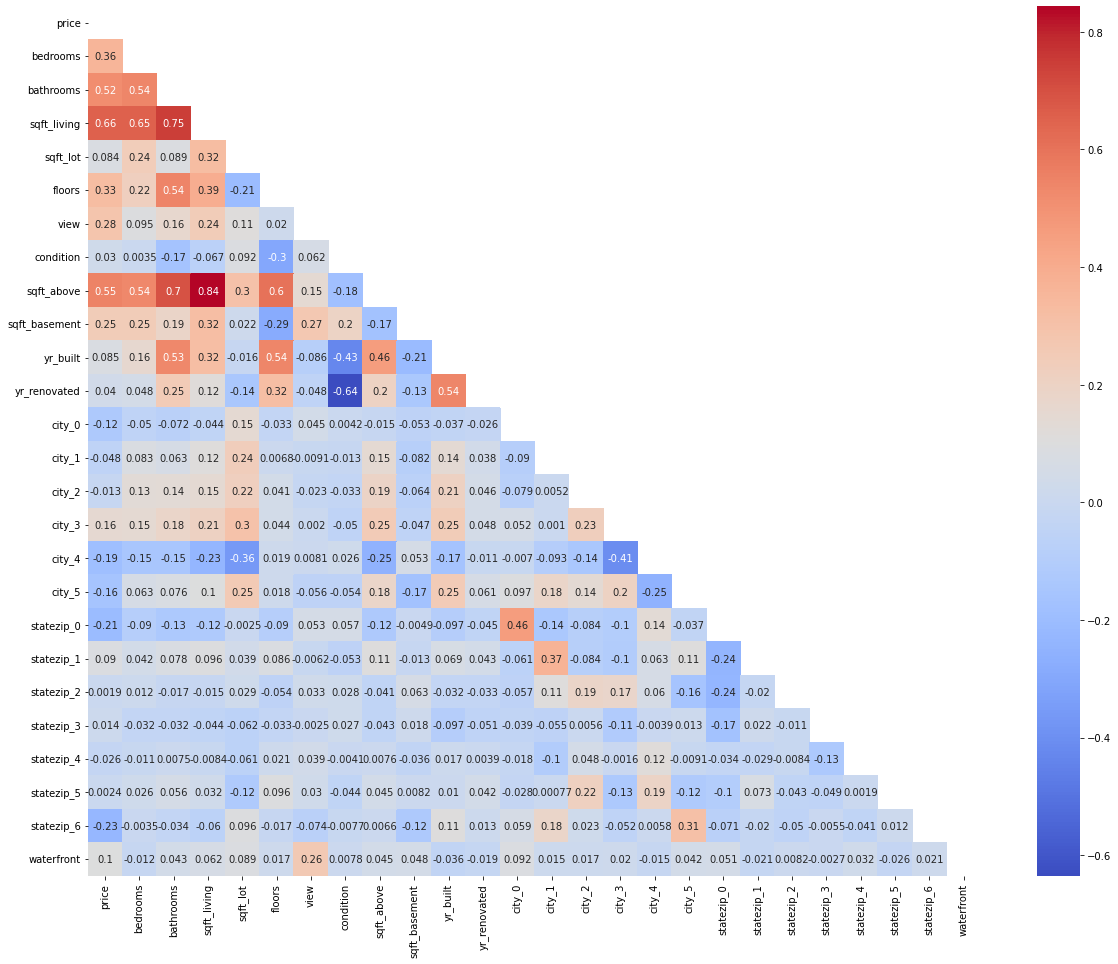

In [ ]:
plt.figure(figsize=(20,16))
fig_corr = sns.heatmap(df_corr, mask = mask,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,  annot=True,
            cmap = "coolwarm")

In [ ]:
#Drop: 
#"sqft_above"(a favor de "sqft_living") - por menor correlacion lineal con precio
#"bedrooms"(a favor de "bathrooms") - corr. con precio
#"bathrooms" (a favor de "sqft_living") - corr. con precio
#"yr_built" (a vafor de "floors") - corr. con precio
#"yr_renovated"(a favor de "condition") - tiene alto % de valores modelados y ruido, 
  ##mientras que "condition" muestra pocos zeros y una distibucion parecida a la normal,
  ##a la vez su differencia de correlacion lineal con "price" es relativamente pequeña.


##**Selección Fichas**

In [ ]:
#eliminacion de coumnas correlacionadas
drop_cols=["sqft_above", "bedrooms", "bathrooms", "yr_built", "yr_renovated" ]
x.drop(columns = drop_cols, inplace = True)
x.columns

Index(['sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
       'sqft_basement', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
       'city_5', 'statezip_0', 'statezip_1', 'statezip_2', 'statezip_3',
       'statezip_4', 'statezip_5', 'statezip_6', 'waterfront'],
      dtype='object')

<ipython-input-113-3b61f0965afd>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(xy_cleaned.corr(), dtype=np.bool))


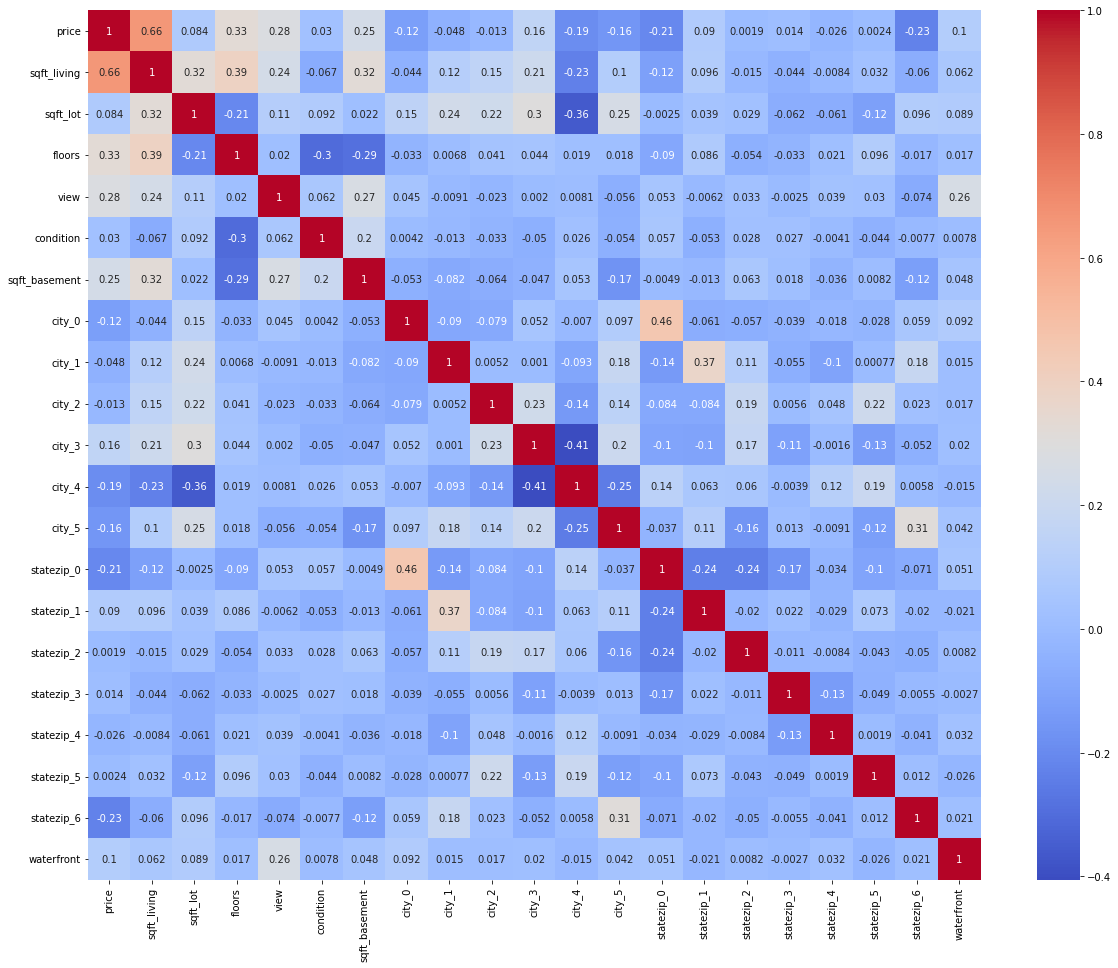

In [ ]:
#renovamos con los datos limpios
xy_cleaned = pd.concat([y,x], axis = 1)
mask = np.triu(np.ones_like(xy_cleaned.corr(), dtype=np.bool))
#visualización 
plt.figure(figsize=(20,16))
fig_corr = sns.heatmap(xy_cleaned.corr(method = "spearman"), 
            xticklabels=xy_cleaned.columns,
            yticklabels=xy_cleaned.columns,  annot=True,
            cmap = "coolwarm")

##**Separacion de train y test data**

In [ ]:
#train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)

#HIPÓTESIS 1 - de base

Use los procedimientos estandares para procesar el data set. 
Peculiaridades:
* no elimine outliers extremos
* supuse que la columna "date" no daria ninguna informacion para un modelo lineal, la elimine.
* no exlui columnas de city_0 - city_5 aunque muestra un grado de correlacion con otras
* exclui fichas correladas a base (en la mayoria de casos) de menor efecto a la columna target.
* Zeros en la ficha excluida [yr_renovated] fueron modelados 2735 valores:
910 rellenos desde la columna "yr_bild" y el resto - con la mediana de valores validos de "yr_renovate". 
* Normalizacion aplicada - Robust Scaler()
* Normalizacion ha sido aplicada antes de dividir el dataset al train y test.

##**Entrenamiento Regresión lineal**


In [ ]:
#entrenamiento
lin_reg = LinearRegression()
a = lin_reg.fit(x_train, y_train) 


In [ ]:
a_coef = a.coef_
a_coef

array([[ 0.93331419, -0.01478642, -0.02120797,  0.18684314,  0.14033634,
        -0.13679431,  0.06346768, -0.2874075 , -0.18974647,  0.12192495,
        -0.09139123, -0.47243651, -0.34873239,  0.21873224,  0.00947353,
         0.01205858, -0.07367716, -0.04526692, -0.17338634,  1.71794106]])

In [ ]:
#Es curioso ver los coeficienes del modelo
coef_df = pd.DataFrame(a_coef,columns = x.columns).T
coef_df.rename(columns = {0: "Coeficientes"})

,Coeficientes
sqft_living,0.933314
sqft_lot,-0.014786
floors,-0.021208
view,0.186843
condition,0.140336
sqft_basement,-0.136794
city_0,0.063468
city_1,-0.287408
city_2,-0.189746
city_3,0.121925


##**Validación**

In [ ]:
#Prediccion
prediccion_train = lin_reg.predict(x_train)
prediccion_test = lin_reg.predict(x_test)

In [ ]:
#MSE de predicción a partir de TRAIN data (en unidades escaladas)
mse_train = mean_squared_error(y_true = y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 1 es: " + str(mse_train))

#MSE de predicción a partir de TEST data
mse_test = mean_squared_error(y_true = y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 1 es: " + str(mse_test))

MSE TRAIN para HIPOTESIS 1 es: 0.8591238205422558
MSE TEST para HIPOTESIS 1 es: 7.386475973909107


In [ ]:
#MAE de predicción a partir de TRAIN data (en unidades escaladas)
mae_train = mean_absolute_error(y_true = y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 1 es: " + str(mae_train))

#MSE de predicción a partir de TEST data
mae_test = mean_absolute_error(y_true = y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 1 es: " + str(mae_test))

MAE TRAIN para HIPOTESIS 1 es: 0.4583984413019138
MAE TEST para HIPOTESIS 1 es: 0.529774590192525


In [ ]:
#Error que daria un valor promedio en el test data set:
dummy_predict = [y_test.mean() for _ in range (len(y_test))]
#MSE de predicción a partir de TEST data
mse_test_mean = mean_squared_error(y_true = y_test, y_pred = dummy_predict)
print("MSE TEST para predicciones = mean: " + str(mse_test_mean))
mae_test_mean = mean_absolute_error(y_true = y_test, y_pred = dummy_predict)
print("MAE TEST para predicciones = mean: " + str(mae_test_mean))

#R^2 TEST
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 1 es: " + str(r2))

MSE TEST para predicciones = mean: 8.004806376719829
MAE TEST para predicciones = mean: 0.8155472334914268
R^2 TEST para HIPOTESIS 1 es: 0.07724489184510397


#**HIPÓTESIS 2 (TRAIN/TEST normalizacion)**
Normalizacion con coeficientes calculados a base de TRAIN data, aplicados al TEST data

In [ ]:
df.describe().T #chequeo el data set a usar

,count,mean,std,min,25%,50%,75%,max
price,4549.0,557625.653765,563891.453612,7800.00,326100.00,465000.00,657500.0,26590000.0
bedrooms,4549.0,3.396131,0.901988,1.00,3.00,3.00,4.0,9.0
bathrooms,4549.0,2.155968,0.775205,0.75,1.75,2.25,2.5,8.0
sqft_living,4549.0,2131.578809,955.234941,370.00,1460.00,1970.00,2610.0,13540.0
sqft_lot,4549.0,14834.598813,35971.144296,638.00,5000.00,7680.00,10970.0,1074218.0
floors,4549.0,1.511651,0.537794,1.00,1.00,1.50,2.0,3.5
waterfront,4549.0,0.006595,0.080949,0.00,0.00,0.00,0.0,1.0
view,4549.0,0.234337,0.765085,0.00,0.00,0.00,0.0,4.0
condition,4549.0,3.449549,0.675242,1.00,3.00,3.00,4.0,5.0
sqft_above,4549.0,1821.291932,853.292493,370.00,1190.00,1590.00,2300.0,9410.0


In [ ]:
#Separacion en variables independientes y dependientes
x = df.drop("price", 1, inplace = False)
y = df["price"]
x.columns

<ipython-input-123-ab490b0ab95a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = df.drop("price", 1, inplace = False)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

##Separación train y test data 

In [ ]:
#train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)

##Aplicación de RobustScaler()


In [ ]:
#Transformando x , y. 
x_train_to_scale = x_train[cols_to_norm].copy() #parte de x_train a normalizar
x_test_to_scale = x_test[cols_to_norm].copy()#parte de x_test a normalizar

scaled_x_train = scaler.fit_transform(x_train_to_scale) #np array
scaled_x_test = scaler.transform(x_test_to_scale) #np array

#Desactivo normalizacion para la variable target - resulta que no influye al R^2 en nuestro caso. 
#Tampoco hago una hipotesis mas para el caso para economizar el espacio.

##y_train = y_train.to_numpy().reshape(-1, 1) #convercion a un np array 
#y_test = y_test.to_numpy().reshape(-1, 1) #convercion a un np array 

##scaled_y_train = scaler.fit_transform(y_train)# np array
##scaled_y_test = scaler.transform(y_test)




In [ ]:
#df de binarias de x_train a concatenar 
x_test_binary = x_test[binary_cols].reset_index(drop=True) 
x_train_binary = x_train[binary_cols].reset_index(drop=True)

#transformando x to df
scaled_x_train_df = pd.DataFrame(scaled_x_train, columns = cols_to_norm)
scaled_x_test_df = pd.DataFrame(scaled_x_test, columns = cols_to_norm)

#transformando y to df
##scaled_y_train_df = pd.DataFrame(scaled_y_train, columns = ["price"]) 
##scaled_y_test_df = pd.DataFrame(scaled_y_test, columns = ["price"]) 

In [ ]:
# concatenando
scaled_x_train_all = pd.concat([scaled_x_train_df, x_train_binary], axis = 1)
scaled_x_test_all = pd.concat([scaled_x_test_df, x_test_binary], axis = 1)

#control de indexacion
print(scaled_x_train_all.index.max())
print(scaled_x_test_all.index.max())
print(x_test_binary.index.max())
print(x_train_binary.index.max())


3638
909
909
3638


##Exclusion de fichas correlacionadas

In [ ]:
#Las counclusiones son identicas que para hipotesis 1
#Drop: 
#"sqft_above"(a favor de "sqft_living") - por menor correlacion lineal con precio
#"bedrooms"(a favor de "bathrooms") - corr. con precio
#"bathrooms" (a favor de "sqft_living") - corr. con precio
#"yr_built" (a vafor de "floors") - corr. con precio
#"yr_renovated"(a favor de "condition") - tiene alto % de valores modelados y ruido, 
  ##mientras que "condition" muestra pocos zeros y una distibucion parecida a la normal,
  ##a la vez su differencia de correlacion lineal con "price" es relativamente pequeña.


In [ ]:
#eliminacion de coumnas correlacionadas en TEST y TRAIN data 
drop_cols=["sqft_above", "bedrooms", "bathrooms", "yr_built", "yr_renovated" ]
x_train = scaled_x_train_all.drop(columns = drop_cols)
x_test = scaled_x_test_all.drop(columns = drop_cols)
x_train.columns, x_test.columns #control

(Index(['sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
        'sqft_basement', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
        'city_5', 'statezip_0', 'statezip_1', 'statezip_2', 'statezip_3',
        'statezip_4', 'statezip_5', 'statezip_6', 'waterfront'],
       dtype='object'),
 Index(['sqft_living', 'sqft_lot', 'floors', 'view', 'condition',
        'sqft_basement', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
        'city_5', 'statezip_0', 'statezip_1', 'statezip_2', 'statezip_3',
        'statezip_4', 'statezip_5', 'statezip_6', 'waterfront'],
       dtype='object'))

##**Entrenamiento**

In [ ]:
#entrenamiento
lin_reg = LinearRegression()
b = lin_reg.fit(x_train, y_train) 
b_coef = b.coef_
b_coef

array([ 309300.32252041,   -5013.90284393,   -7028.32094356,
         61919.81733037,   46507.46188302,  -45711.41572835,
         21033.18958333,  -95246.84601472,  -62881.97911759,
         40405.92718709,  -30287.05525822, -156565.45928401,
       -115569.9134968 ,   72487.86506194,    3139.52827397,
          3996.21204328,  -24416.61122925,  -15001.45817879,
        -57460.23357283,  569325.66669449])

##**Validacion**

In [ ]:
#Prediccion
prediccion_train = lin_reg.predict(x_train)
prediccion_test = lin_reg.predict(x_test)

In [ ]:
#MSE , TRAIN data (en unidades escaladas)
mse_train_hip2 = mean_squared_error(y_true = y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 2 es: " + str(mse_train_hip2))

#MSE , TEST data (en unidades escaladas)
mse_test_hip2 = mean_squared_error(y_true = y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 2 es: " + str(mse_test_hip2))

print("\nHipotesis anteriores:")
print("MSE TRAIN para HIPOTESIS 1 es: " + str(mse_train))
print("MSE TEST para HIPOTESIS 1 es: " + str(mse_test))


MSE TRAIN para HIPOTESIS 2 es: 94354098349.92096
MSE TEST para HIPOTESIS 2 es: 811226814851.5029

Hipotesis anteriores:
MSE TRAIN para HIPOTESIS 1 es: 0.8591238205422558
MSE TEST para HIPOTESIS 1 es: 7.386475973909107


In [ ]:
#MAE y R, TRAIN data (en unidades escaladas)
mae_train_hip2 = mean_absolute_error(y_true = y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 2 es: " + str(mae_train_hip2))

#MAE, TEST data (en unidades escaladas)
mae_test_hip2 = mean_absolute_error(y_true = y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 2 es: " + str(mae_test_hip2))

#R^2 TEST
r2_hip2 = r2_score(y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 2 es: " + str(r2_hip2))

print("\nHipotesis anteriores:")
print("MAE TRAIN para HIPOTESIS 1 es: " + str(mae_train))
print("MAE TEST para HIPOTESIS 1 es: " + str(mae_test))
print("R^2 TEST para HIPOTESIS 1 es: " + str(r2))

MAE TRAIN para HIPOTESIS 2 es: 151913.24344745433
MAE TEST para HIPOTESIS 2 es: 175567.29918980293
R^2 TEST para HIPOTESIS 2 es: 0.07724489184510375

Hipotesis anteriores:
MAE TRAIN para HIPOTESIS 1 es: 0.4583984413019138
MAE TEST para HIPOTESIS 1 es: 0.529774590192525
R^2 TEST para HIPOTESIS 1 es: 0.07724489184510397


##**HIPÓTESIS 3 (Outliers)**
Exclusion de outliers para columnas cuantitativas nobinarias incluidas al modelo.
Los límites del intervalo para deteccion de outliers se ajustaron en proporcion a la distorsión de los datos 
[Q1 – 3A; Q3 + 3B], donde A = Q2 – Q1 y B = Q3 – Q2
en vez de [Q1 – 1,5 IQR; Q3 + 1,5 IQR]. Asi para todas menos "sqft_basement". Para la cual ha sido usada la formula habitual.
No tiene escalado.


In [ ]:
df.describe().T #chequeo el data set a usar

,count,mean,std,min,25%,50%,75%,max
price,4549.0,557625.653765,563891.453612,7800.00,326100.00,465000.00,657500.0,26590000.0
bedrooms,4549.0,3.396131,0.901988,1.00,3.00,3.00,4.0,9.0
bathrooms,4549.0,2.155968,0.775205,0.75,1.75,2.25,2.5,8.0
sqft_living,4549.0,2131.578809,955.234941,370.00,1460.00,1970.00,2610.0,13540.0
sqft_lot,4549.0,14834.598813,35971.144296,638.00,5000.00,7680.00,10970.0,1074218.0
floors,4549.0,1.511651,0.537794,1.00,1.00,1.50,2.0,3.5
waterfront,4549.0,0.006595,0.080949,0.00,0.00,0.00,0.0,1.0
view,4549.0,0.234337,0.765085,0.00,0.00,0.00,0.0,4.0
condition,4549.0,3.449549,0.675242,1.00,3.00,3.00,4.0,5.0
sqft_above,4549.0,1821.291932,853.292493,370.00,1190.00,1590.00,2300.0,9410.0


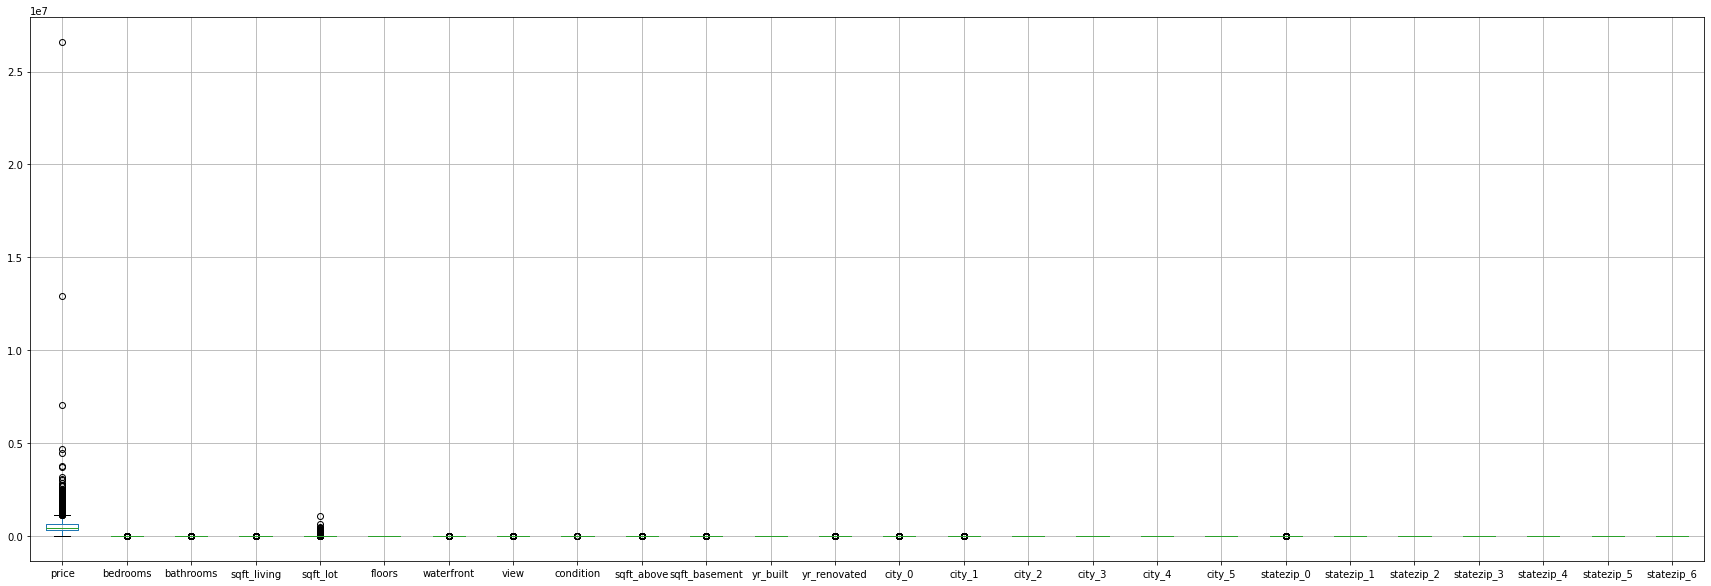

In [ ]:
df.boxplot(figsize = (30,10)) #columna precios tiene mayores outliers

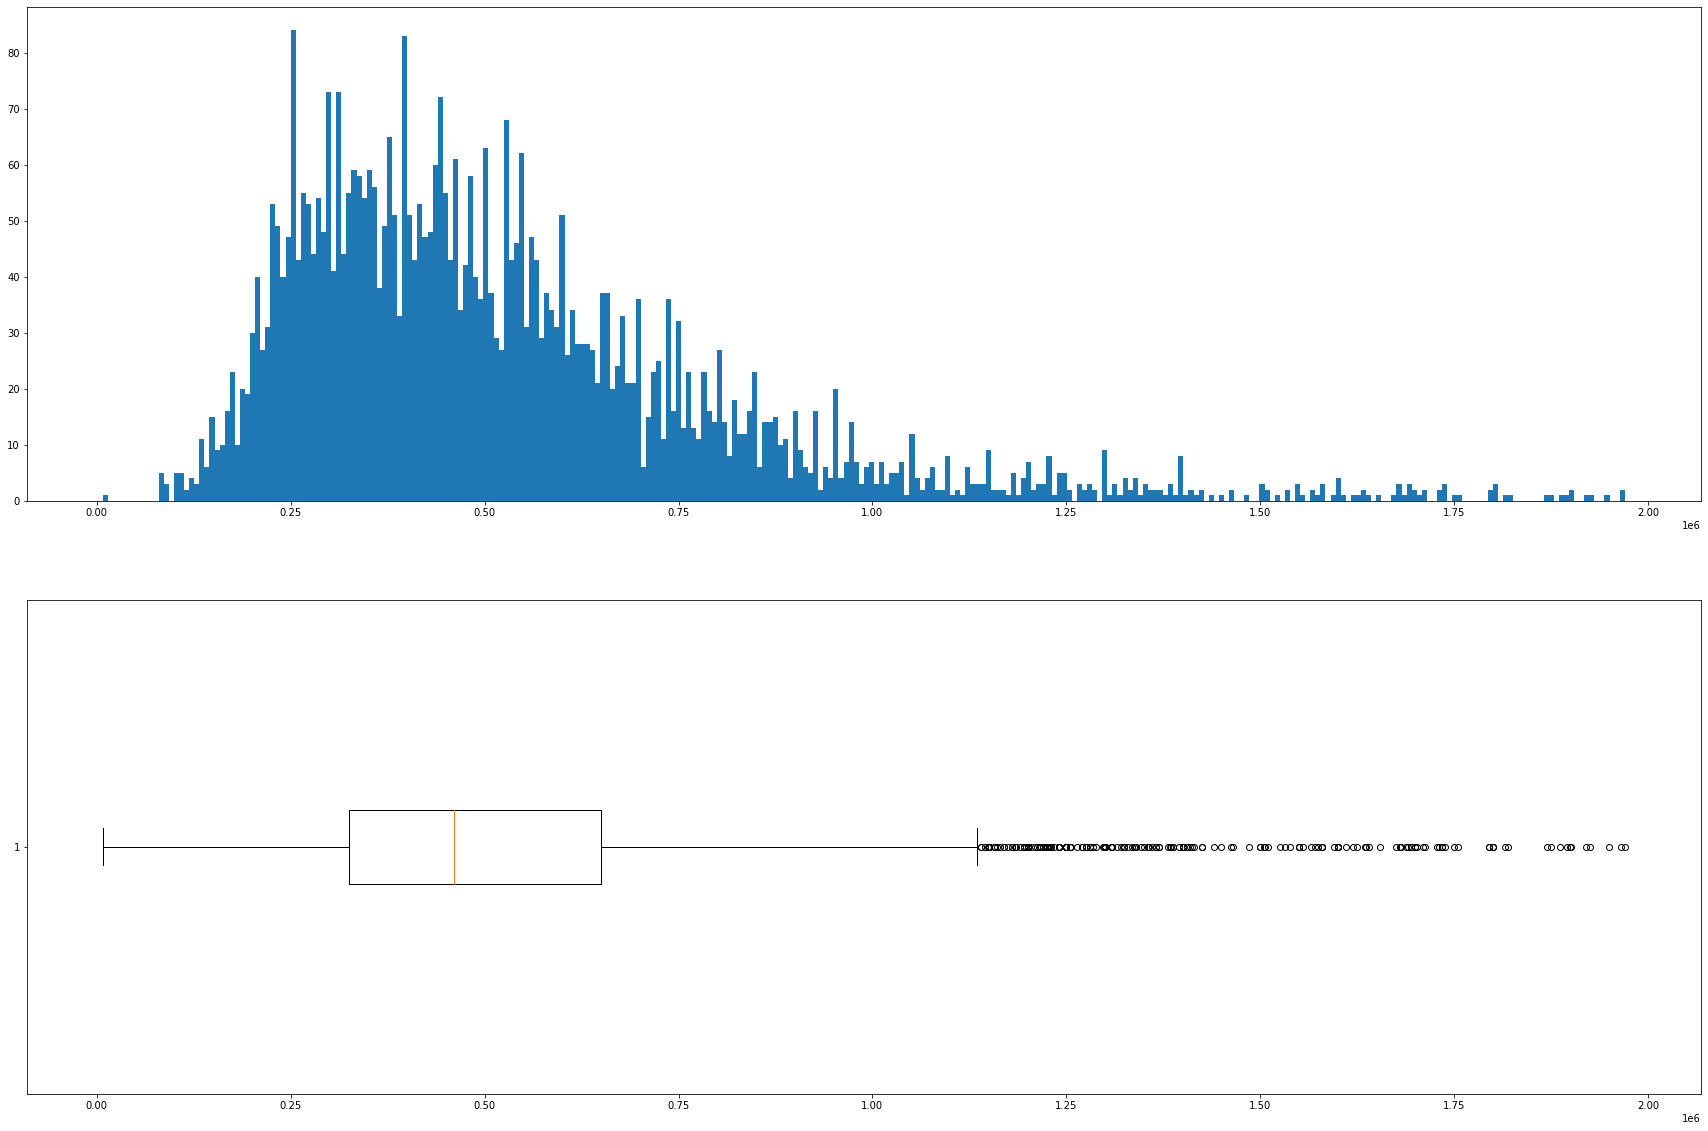

In [ ]:
#visualizacion de histograma con 300 bins y un boxplot da mejor entendimiento de la situación 

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(30,20)) 

axs[0].hist(df['price'].drop(df['price'].nlargest(50).index,inplace = False), bins = 300) #quito los valores mas grandes
axs[1].boxplot(df['price'].drop(df['price'].nlargest(50).index,inplace = False), vert = False) #quito los valores mas grandes
plt.show()


In [ ]:
#Calculando los imites del intervalo [min = Q1 – 3A; max = Q3 + 3B], donde A = Q2 – Q1 y B = Q3 – Q2
def def_limits(data = df["price"]):
  q1= data.quantile(0.25)
  q2=data.quantile(0.5)
  q3=data.quantile(0.75)
  min=data.min()
  max=data.max()

  #cuando mas consideramos despues de q1 y q2?
  A = (q2 - q1)
  B = (q3 - q2)

  min_limit_theoric = (q1 - 3*A) 
  max_limit_theoric = (q3 + 3*B)
  print("Min: " , min, ", Theoria: ", min_limit_theoric,  "\nMax: ", max, ", Teoria: ", max_limit_theoric)

  #Limites reales, considerando el data real que tenemos

  if min_limit_theoric < min:
    min_limit = min
  else:
    min_limit = min_limit_theoric

  if max_limit_theoric > max:
    max_limit = max
  else:
    max_limit = max_limit_theoric
  print("Min limit a usar: ", min_limit,  "\nMax limit a usar: ", max_limit)
  return min_limit, max_limit


###["price"]

In [ ]:
#quitanto los outliers en columna "price"
min_limit, max_limit = def_limits(data = df["price"])
df_outliers = df.loc[df["price"] < max_limit].reset_index(drop=True)

Min:  7800.0 , Theoria:  -90600.0 
Max:  26590000.0 , Teoria:  1235000.0
Min limit a usar:  7800.0 
Max limit a usar:  1235000.0


In [ ]:
df_outliers["price"].count(), df_outliers["price"].max() #cantidadad de entradas y precio maximo

(4351, 1234582.0)

###["sqft_lot"]

In [ ]:
#quitanto los outliers en columna "sqft_lot" - la segunda columna con outliers mas grandes
min_limit, max_limit = def_limits(data = df_outliers["sqft_lot"])

Min:  638 , Theoria:  -2704.0 
Max:  1074218 , Teoria:  20188.0
Min limit a usar:  638 
Max limit a usar:  20188.0


In [ ]:
df_outliers = df_outliers.loc[df_outliers["sqft_lot"] < max_limit].reset_index(drop=True)

In [ ]:
df_outliers["sqft_lot"].count(), df_outliers["sqft_lot"].max() #cantidadad de entradas y maxima superficie del lot

(3858, 20181)

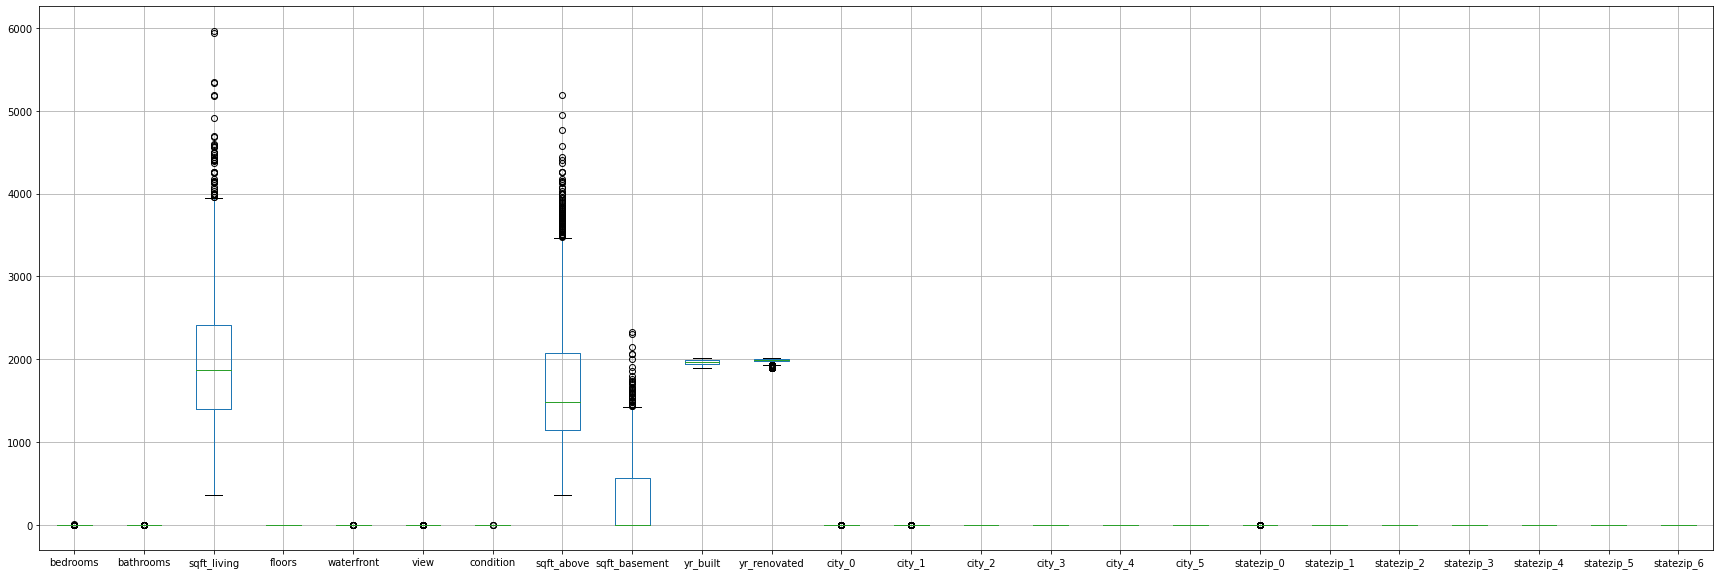

In [ ]:
df_outliers.drop(["price", "sqft_lot"], axis = 1, inplace = False).boxplot(figsize = (30,10)) #columna precios tiene mayores outliers

###["sqft_living"]

In [ ]:
#quitanto los outliers en columna "sqft_living"
min_limit, max_limit = def_limits(data = df_outliers["sqft_living"])


Min:  370 , Theoria:  -10.0 
Max:  5960 , Teoria:  4070.0
Min limit a usar:  370 
Max limit a usar:  4070.0


In [ ]:
df_outliers = df_outliers.loc[df_outliers["sqft_living"] < max_limit].reset_index(drop=True) #guardando

In [ ]:
df_outliers["sqft_living"].count(), df_outliers["sqft_living"].max() #cantidadad de entradas y valor maximo

(3820, 4060)

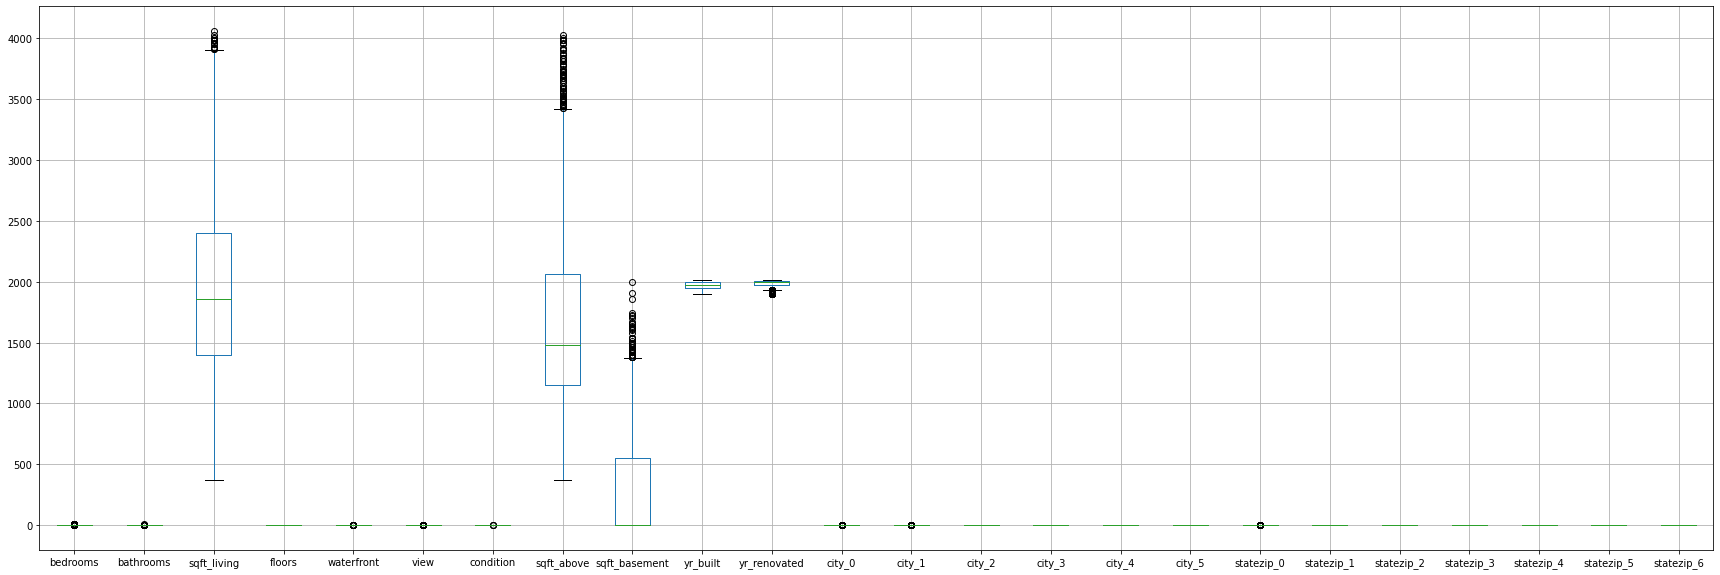

In [ ]:
df_outliers.drop(["price", "sqft_lot"], axis = 1, inplace = False).boxplot(figsize = (30,10)) #columna precios tiene mayores outliers

###["sqft_basement"]

In [ ]:
#quitanto los outliers en columna "sqft_basement"
min_limit, max_limit = def_limits(data = df_outliers["sqft_basement"]) 

Min:  0 , Theoria:  0.0 
Max:  2000 , Teoria:  2200.0
Min limit a usar:  0.0 
Max limit a usar:  2000


In [ ]:
#no plico eliminacion debido a que segun mi formula no los tiene

{'whiskers': [<matplotlib.lines.Line2D at 0x7f75b70161c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f75b7016880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f75b7644e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f75b7016f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75b7027280>],
 'means': []}

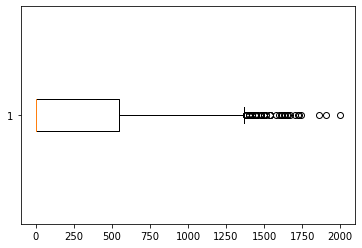

In [ ]:
#El boxplot usa 1,5 IQR distancia para definir los limites
plt.boxplot(df_outliers["sqft_basement"], vert = False) #columna precios tiene mayores outliers

In [ ]:
#creando formula para definir limites con 1.5 IQR
def def_limits_15IQR(data = df_outliers["sqft_basement"]):
  q1= data.quantile(0.25)
  q2=data.quantile(0.5)
  q3=data.quantile(0.75)
  min=data.min()
  max=data.max()

  #cuando mas consideramos despues de q1 y q2?
  IQR = q3-q1
  min_limit_theoric = (q1 - 1.5*IQR) 
  max_limit_theoric = (q3 + 1.5*IQR)
  print("Min: " , min, ", Theoria: ", min_limit_theoric,  "\nMax: ", max, ", Teoria: ", max_limit_theoric)

  #Limites reales, considerando el data real que tenemos

  if min_limit_theoric < min:
    min_limit = min
  else:
    min_limit = min_limit_theoric

  if max_limit_theoric > max:
    max_limit = max
  else:
    max_limit = max_limit_theoric
  print("Min limit a usar: ", min_limit,  "\nMax limit a usar: ", max_limit)
  return min_limit, max_limit


In [ ]:
#aplicando
min_limit, max_limit = def_limits_15IQR(data = df_outliers["sqft_basement"]) 

Min:  0 , Theoria:  -825.0 
Max:  2000 , Teoria:  1375.0
Min limit a usar:  0 
Max limit a usar:  1375.0


In [ ]:
df_outliers = df_outliers.loc[df_outliers["sqft_basement"] < max_limit].reset_index(drop=True) #guardando

In [ ]:
df_outliers["sqft_basement"].count(), df_outliers["sqft_basement"].max() #cantidadad de entradas y valor maximo

(3771, 1370)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f75b78efd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f75b78c9490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f75b78efa30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f75b78c9b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f75b78c9a30>],
 'means': []}

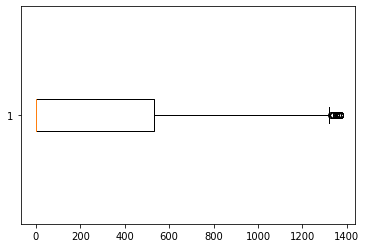

In [ ]:
#El boxplot usa 1,5 IQR distancia para definir los limites
plt.boxplot(df_outliers["sqft_basement"], vert = False) #columna precios tiene mayores outliers

In [ ]:
#columnas que tenemos en nuestro DF
df_outliers.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

In [ ]:
#guardo el DataSet en esta etapa para reusarlo en otras hipotesis.
df_hip3_allcols = df_outliers

##Exclusion de correlaciones

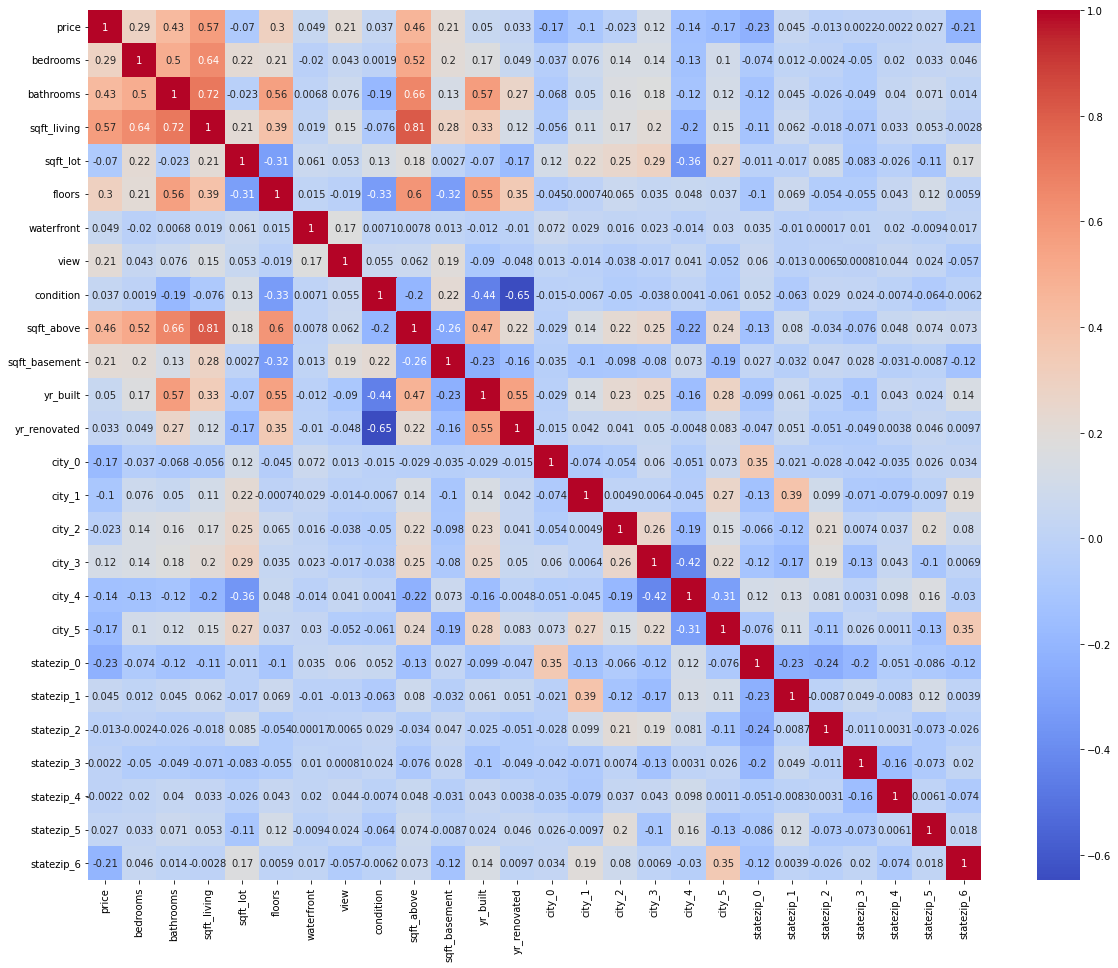

In [ ]:
#mapa de correlacion
df_corr = df_outliers.corr(method = "spearman") 
plt.figure(figsize=(20,16))
fig_corr = sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,  annot=True,
            cmap = "coolwarm")

In [ ]:
#eliminacion de coumnas correlacionadas 
drop_cols=["sqft_above", "bedrooms", "bathrooms", "yr_built", "yr_renovated", "price" ] #las mismas que en las hipotesis anteriores
x = df_outliers.drop(columns = drop_cols)
y = df_outliers["price"]
x.columns, y #control

(Index(['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
        'sqft_basement', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
        'city_5', 'statezip_0', 'statezip_1', 'statezip_2', 'statezip_3',
        'statezip_4', 'statezip_5', 'statezip_6'],
       dtype='object'), 0       313000.000000
 1       342000.000000
 2       420000.000000
 3       550000.000000
 4       490000.000000
             ...      
 3766    308166.666667
 3767    534333.333333
 3768    416904.166667
 3769    203400.000000
 3770    220600.000000
 Name: price, Length: 3771, dtype: float64)

In [ ]:
#guardo el DataSet para reusarlo
df_hip3 = df_outliers.drop(columns = drop_cols)

##Separación train y test data

In [ ]:
#train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)

##Entrenanamiento


In [ ]:
#entrenamiento
lin_reg = LinearRegression()
c = lin_reg.fit(x_train, y_train) 
c_coef = c.coef_
c_coef

array([ 1.90134580e+02, -5.19553301e+00,  1.68571301e+04,  2.48475799e+05,
        4.72632119e+04,  4.67585291e+04, -3.77616840e+01, -7.83928926e+04,
       -6.65000964e+04, -3.05277562e+04,  2.69864012e+04, -4.23302929e+04,
       -9.83331542e+04, -1.24379690e+05,  3.66452541e+04, -1.24783353e+04,
        3.03297883e+03, -1.76365880e+04, -1.23004759e+04, -4.76785370e+04])

##Validación 

In [ ]:
#Prediccion
prediccion_train = lin_reg.predict(x_train)
prediccion_test = lin_reg.predict(x_test)


In [ ]:
#MSE TRAIN data (en unidades escaladas)
mse_train_hip3 = mean_squared_error(y_true = y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 3 es: " + str(mse_train_hip3))

#MSE TEST data (en unidades escaladas)
mse_test_hip3 = mean_squared_error(y_true = y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 3 es: " + str(mse_test_hip3))

#MAE TRAIN data (en unidades reales)
mae_train_hip3 = mean_absolute_error(y_true = y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 3 es: " + str(mae_train_hip3))

#MAE TEST data (en unidades reales)
mae_test_hip3 = mean_absolute_error(y_true = y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 3 es: " + str(mae_test_hip3))

#R^2 TEST
r2_hip3 = r2_score(y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 3 es: " + str(r2_hip3))

print("\nHipotesis anteriores:")
print("\n HIPOTESIS 2")
print("MSE TEST: " + str(mse_test_hip2))
print("MAE TEST: " + str(mae_test_hip2))
print("R^2 TEST: " + str(r2_hip2))

print("\n HIPOTESIS 1")
print("MSE TEST: " + str(mse_test))
print("MAE TEST: " + str(mae_test))
print("R^2 TEST: " + str(r2))


MSE TRAIN para HIPOTESIS 3 es: 20476261329.249146
MSE TEST para HIPOTESIS 3 es: 21387578176.30372
MAE TRAIN para HIPOTESIS 3 es: 110991.62651003514
MAE TEST para HIPOTESIS 3 es: 113191.78854921885
R^2 TEST para HIPOTESIS 3 es: 0.5313849296772302

Hipotesis anteriores:

 HIPOTESIS 2
MSE TEST: 811226814851.5029
MAE TEST: 175567.29918980293
R^2 TEST: 0.07724489184510375

 HIPOTESIS 1
MSE TEST: 7.386475973909107
MAE TEST: 0.529774590192525
R^2 TEST: 0.07724489184510397


#HIPOTESIS 4(Outliers - exclusion agresiva)
La hipotesis 3 se confirmo con una importane mejora en el los errores del modelo. Para mejorar aun mas usaré el metodo clasico 1.5xIQR para determinar los limites de los outliers.

No tiene escalado.

Al final descarto este hipotesis debido a que dio peores resultados que la anterior - la tercera.

In [ ]:
df.describe().T #chequeo el data set a usar

,count,mean,std,min,25%,50%,75%,max
price,4549.0,557625.653765,563891.453612,7800.00,326100.00,465000.00,657500.0,26590000.0
bedrooms,4549.0,3.396131,0.901988,1.00,3.00,3.00,4.0,9.0
bathrooms,4549.0,2.155968,0.775205,0.75,1.75,2.25,2.5,8.0
sqft_living,4549.0,2131.578809,955.234941,370.00,1460.00,1970.00,2610.0,13540.0
sqft_lot,4549.0,14834.598813,35971.144296,638.00,5000.00,7680.00,10970.0,1074218.0
floors,4549.0,1.511651,0.537794,1.00,1.00,1.50,2.0,3.5
waterfront,4549.0,0.006595,0.080949,0.00,0.00,0.00,0.0,1.0
view,4549.0,0.234337,0.765085,0.00,0.00,0.00,0.0,4.0
condition,4549.0,3.449549,0.675242,1.00,3.00,3.00,4.0,5.0
sqft_above,4549.0,1821.291932,853.292493,370.00,1190.00,1590.00,2300.0,9410.0


In [ ]:
#quitanto los outliers en columna "price"
min_limit, max_limit = def_limits_15IQR(data = df["price"])
df_outliers = df.loc[df["price"] < max_limit].reset_index(drop=True)


Min:  7800.0 , Theoria:  -171000.0 
Max:  26590000.0 , Teoria:  1154600.0
Min limit a usar:  7800.0 
Max limit a usar:  1154600.0


In [ ]:
df_outliers["price"].count(), df_outliers["price"].max() #cantidadad de entradas y precio maximo

(4310, 1150000.0)

In [ ]:
#quitanto los outliers y guardando la columna
min_limit, max_limit = def_limits_15IQR(data = df_outliers["sqft_lot"])
df_outliers = df_outliers.loc[df_outliers["sqft_lot"] < max_limit].reset_index(drop=True)


Min:  638 , Theoria:  -3545.875 
Max:  1074218 , Teoria:  19243.125
Min limit a usar:  638 
Max limit a usar:  19243.125


In [ ]:
df_outliers["sqft_lot"].count(), df_outliers["sqft_lot"].max() #cantidadad de entradas y maxima superficie del lot

(3808, 19206)

In [ ]:
#quitanto los outliers y guardando la columna
min_limit, max_limit = def_limits_15IQR(data = df_outliers["sqft_living"])
df_outliers = df_outliers.loc[df_outliers["sqft_living"] < max_limit].reset_index(drop=True)


Min:  370 , Theoria:  -103.75 
Max:  5960 , Teoria:  3906.25
Min limit a usar:  370 
Max limit a usar:  3906.25


In [ ]:
df_outliers["sqft_living"].count(), df_outliers["sqft_living"].max() #cantidadad de entradas y valor maximo

(3758, 3900)

In [ ]:
#quitanto los outliers y guardando la columna
min_limit, max_limit = def_limits_15IQR(data = df_outliers["sqft_basement"])
df_outliers = df_outliers.loc[df_outliers["sqft_basement"] < max_limit].reset_index(drop=True)

Min:  0 , Theoria:  -825.0 
Max:  1860 , Teoria:  1375.0
Min limit a usar:  0 
Max limit a usar:  1375.0


In [ ]:
df_outliers["sqft_basement"].count(), df_outliers["sqft_basement"].max() #cantidadad de entradas y valor maximo

(3712, 1370)

##Exclusion correlaciones

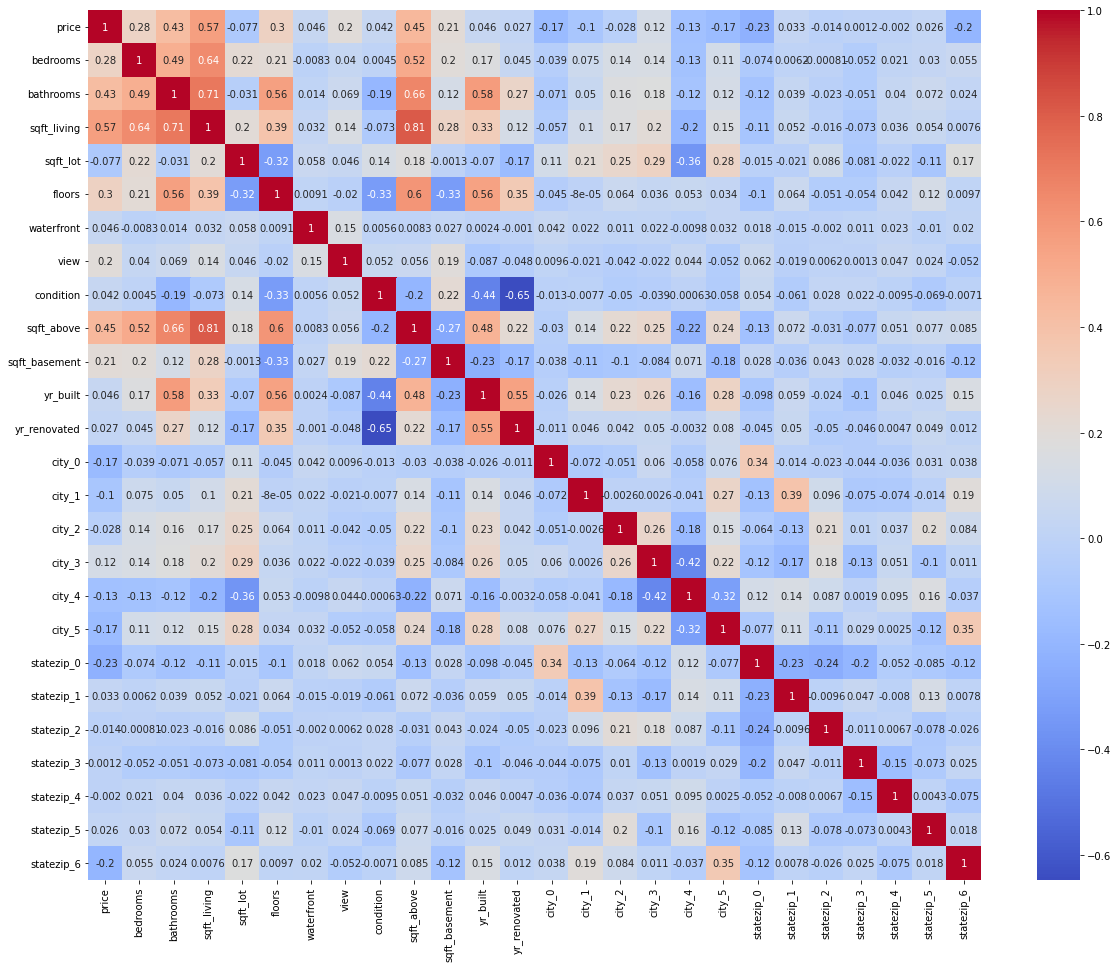

In [ ]:
#mapa de correlacion
df_corr = df_outliers.corr(method = "spearman") 
plt.figure(figsize=(20,16))
fig_corr = sns.heatmap(df_corr,
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,  annot=True,
            cmap = "coolwarm")

In [ ]:
#eliminacion de coumnas correlacionadas 
drop_cols=["sqft_above", "bedrooms", "bathrooms", "yr_built", "yr_renovated", "price" ] #las mismas que en las hipotesis anteriores
x = df_outliers.drop(columns = drop_cols)
y = df_outliers["price"]
x.columns, y #control

(Index(['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
        'sqft_basement', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4',
        'city_5', 'statezip_0', 'statezip_1', 'statezip_2', 'statezip_3',
        'statezip_4', 'statezip_5', 'statezip_6'],
       dtype='object'), 0       313000.000000
 1       342000.000000
 2       420000.000000
 3       550000.000000
 4       490000.000000
             ...      
 3707    308166.666667
 3708    534333.333333
 3709    416904.166667
 3710    203400.000000
 3711    220600.000000
 Name: price, Length: 3712, dtype: float64)

##Separacion de TRAIN y TEST , Entrenamiento

In [ ]:
#train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)

In [ ]:

#entrenamiento
lin_reg = LinearRegression()
d = lin_reg.fit(x_train, y_train) 
d_coef = d.coef_
d_coef

array([ 1.83559537e+02, -4.81189945e+00,  1.80786880e+04, -1.78542157e+05,
        4.78752295e+04,  4.76323903e+04, -4.00823517e+01, -6.75088104e+04,
       -6.91159785e+04, -3.36043093e+04,  2.47365906e+04, -4.18620025e+04,
       -8.45807902e+04, -1.17253024e+05,  3.40587857e+04, -4.30203316e+03,
        1.01160240e+03, -2.09833258e+04, -1.24516431e+04, -4.75470423e+04])

##Validación 

In [ ]:
#Prediccion
prediccion_train = lin_reg.predict(x_train)
prediccion_test = lin_reg.predict(x_test)

In [ ]:
#MSE TRAIN data (en unidades escaladas)
mse_train_hip4 = mean_squared_error(y_true = y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 4 es: " + str(mse_train_hip4))

#MSE TEST data (en unidades escaladas)
mse_test_hip4 = mean_squared_error(y_true = y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 4 es: " + str(mse_test_hip4))

#MAE TRAIN data (en unidades reales)
mae_train_hip4 = mean_absolute_error(y_true = y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 4 es: " + str(mae_train_hip4))

#MAE TEST data (en unidades reales)
mae_test_hip4 = mean_absolute_error(y_true = y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 4 es: " + str(mae_test_hip4))

#R^2 TEST
r2_hip4 = r2_score(y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 4 es: " + str(r2_hip4))

print("\nHipotesis anteriores:")
print("\n HIPOTESIS 3")
print("MSE TEST: " + str(mse_test_hip3))
print("MAE TEST: " + str(mae_test_hip3))
print("R^2 TEST: " + str(r2_hip3))

print("\n HIPOTESIS 2")
print("MSE TEST: " + str(mse_test_hip2))
print("MAE TEST: " + str(mae_test_hip2))
print("R^2 TEST: " + str(r2_hip2))

print("\n HIPOTESIS 1")
print("MSE TEST: " + str(mse_test))
print("MAE TEST: " + str(mae_test))
print("R^2 TEST: " + str(r2))


MSE TRAIN para HIPOTESIS 4 es: 18852918629.579304
MSE TEST para HIPOTESIS 4 es: 21065484726.200417
MAE TRAIN para HIPOTESIS 4 es: 108022.59839120887
MAE TEST para HIPOTESIS 4 es: 113089.71559914517
R^2 TEST para HIPOTESIS 4 es: 0.5198721888911086

Hipotesis anteriores:

 HIPOTESIS 3
MSE TEST: 21387578176.30372
MAE TEST: 113191.78854921885
R^2 TEST: 0.5313849296772302

 HIPOTESIS 2
MSE TEST: 811226814851.5029
MAE TEST: 175567.29918980293
R^2 TEST: 0.07724489184510375

 HIPOTESIS 1
MSE TEST: 7.386475973909107
MAE TEST: 0.529774590192525
R^2 TEST: 0.07724489184510397


El modelo no reacciono bien al considerar los outliers mas datos: bajó el coeficiente R^2, pero MAE y MSE mostraron poca mejoria). Decidi descarta este hipotesis 4.

#**HIPOTESIS 5** - columnas correlacionadas incluidas
Usare el dataset de la tercera hipotesis - donde elimine los outliers considerando que distribuciones no corespondian a las normales. Dejare maxima cantidad de columnas sin considere la correlacion entre ellas. 

Dropped columns: "data", "street", "country".

Sin escalado.

In [ ]:
#guardo mi DF en una variable nueva
df_5 = df_hip3_allcols.copy() 
#separo target y predictors
x = df_5.drop(columns = "price")
y = df_5["price"]
x.columns #control

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

##Separacion de TRAIN y TEST , Entrenamiento

In [ ]:
#train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)
#entrenamiento
lin_reg = LinearRegression()
e = lin_reg.fit(x_train, y_train) 
e_coef = e.coef_
e_coef

array([-2.60721053e+04,  2.52806881e+04,  1.21568533e+02, -5.31119784e+00,
        3.70541559e+04,  2.34158332e+05,  4.06416895e+04,  4.10848929e+04,
        7.98557654e+01,  4.17127681e+01, -1.63303143e+03,  5.52346645e+02,
       -8.05108941e+04, -5.46624990e+04, -1.63202256e+04,  3.93322898e+04,
       -4.76110021e+04, -8.57332975e+04, -1.18698211e+05,  3.64412577e+04,
       -1.37461325e+04, -1.61661918e+03, -1.41613699e+04, -1.61656851e+04,
       -3.82710088e+04])

##**Validación**

In [ ]:
#Prediccion
prediccion_train = lin_reg.predict(x_train)
prediccion_test = lin_reg.predict(x_test)


#MSE TRAIN data (en unidades escaladas)
mse_train_hip5 = mean_squared_error(y_true = y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 5 es: " + str(mse_train_hip5))

#MSE TEST data (en unidades escaladas)
mse_test_hip5 = mean_squared_error(y_true = y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 5 es: " + str(mse_test_hip5))

#MAE TRAIN data (en unidades reales)
mae_train_hip5 = mean_absolute_error(y_true = y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 5 es: " + str(mae_train_hip5))

#MAE TEST data (en unidades reales)
mae_test_hip5 = mean_absolute_error(y_true = y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 5 es: " + str(mae_test_hip5))

#R^2 TEST
r2_hip5 = r2_score(y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 5 es: " + str(r2_hip5))

print("\nHipotesis anteriores:")
print("\n HIPOTESIS 4")
print("MSE TEST: " + str(mse_test_hip4))
print("MAE TEST: " + str(mae_test_hip4))
print("R^2 TEST: " + str(r2_hip4))

print("\n HIPOTESIS 3")
print("MSE TEST: " + str(mse_test_hip3))
print("MAE TEST: " + str(mae_test_hip3))
print("R^2 TEST: " + str(r2_hip3))

print("\n HIPOTESIS 2")
print("MSE TEST: " + str(mse_test_hip2))
print("MAE TEST: " + str(mae_test_hip2))
print("R^2 TEST: " + str(r2_hip2))

print("\n HIPOTESIS 1")
print("MSE TEST: " + str(mse_test))
print("MAE TEST: " + str(mae_test))
print("R^2 TEST: " + str(r2))


MSE TRAIN para HIPOTESIS 5 es: 19348223610.442623
MSE TEST para HIPOTESIS 5 es: 19936768090.894558
MAE TRAIN para HIPOTESIS 5 es: 107302.52936940735
MAE TEST para HIPOTESIS 5 es: 108898.84457892456
R^2 TEST para HIPOTESIS 5 es: 0.5631730762637501

Hipotesis anteriores:

 HIPOTESIS 4
MSE TEST: 21065484726.200417
MAE TEST: 113089.71559914517
R^2 TEST: 0.5198721888911086

 HIPOTESIS 3
MSE TEST: 21387578176.30372
MAE TEST: 113191.78854921885
R^2 TEST: 0.5313849296772302

 HIPOTESIS 2
MSE TEST: 811226814851.5029
MAE TEST: 175567.29918980293
R^2 TEST: 0.07724489184510375

 HIPOTESIS 1
MSE TEST: 7.386475973909107
MAE TEST: 0.529774590192525
R^2 TEST: 0.07724489184510397


##Hipotesis 5.1 - drop la columnas "city"


In [ ]:
#guardo mi DF en una variable nueva df_5_1
cities = ['city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5']
df_5_1 = df_hip3_allcols.drop(columns = cities).copy() 
#separo target y predictors
x = df_5_1.drop(columns = "price")
y = df_5_1["price"]
x.columns #control

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

In [ ]:
#train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)
#entrenamiento
lin_reg = LinearRegression()
e_1 = lin_reg.fit(x_train, y_train) 

In [ ]:
#Prediccion
prediccion_train = lin_reg.predict(x_train)
prediccion_test = lin_reg.predict(x_test)


#MSE TRAIN data (en unidades escaladas)
mse_train_hip5_1 = mean_squared_error(y_true = y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 5.1 es: " + str(mse_train_hip5_1))

#MSE TEST data (en unidades escaladas)
mse_test_hip5_1 = mean_squared_error(y_true = y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 5.1 es: " + str(mse_test_hip5_1))

#MAE TRAIN data (en unidades reales)
mae_train_hip5_1 = mean_absolute_error(y_true = y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 5.1 es: " + str(mae_train_hip5_1))

#MAE TEST data (en unidades reales)
mae_test_hip5_1 = mean_absolute_error(y_true = y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 5.1 es: " + str(mae_test_hip5_1))

#R^2 TEST
r2_hip5_1 = r2_score(y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 5.1 es: " + str(r2_hip5_1))

print("\nHipotesis anteriores:")
print("\n HIPOTESIS 5")
print("MSE TEST: " + str(mse_test_hip5))
print("MAE TEST: " + str(mae_test_hip5))
print("R^2 TEST: " + str(r2_hip5))

print("\n HIPOTESIS 4")
print("MSE TEST: " + str(mse_test_hip4))
print("MAE TEST: " + str(mae_test_hip4))
print("R^2 TEST: " + str(r2_hip4))

print("\n HIPOTESIS 3")
print("MSE TEST: " + str(mse_test_hip3))
print("MAE TEST: " + str(mae_test_hip3))
print("R^2 TEST: " + str(r2_hip3))

print("\n HIPOTESIS 2")
print("MSE TEST: " + str(mse_test_hip2))
print("MAE TEST: " + str(mae_test_hip2))
print("R^2 TEST: " + str(r2_hip2))

print("\n HIPOTESIS 1")
print("MSE TEST: " + str(mse_test))
print("MAE TEST: " + str(mae_test))
print("R^2 TEST: " + str(r2))


MSE TRAIN para HIPOTESIS 5.1 es: 21475718082.58317
MSE TEST para HIPOTESIS 5.1 es: 21823871151.601944
MAE TRAIN para HIPOTESIS 5.1 es: 113964.95711088424
MAE TEST para HIPOTESIS 5.1 es: 114699.50294558737
R^2 TEST para HIPOTESIS 5.1 es: 0.5218254806542812

Hipotesis anteriores:

 HIPOTESIS 5
MSE TEST: 19936768090.894558
MAE TEST: 108898.84457892456
R^2 TEST: 0.5631730762637501

 HIPOTESIS 4
MSE TEST: 21065484726.200417
MAE TEST: 113089.71559914517
R^2 TEST: 0.5198721888911086

 HIPOTESIS 3
MSE TEST: 21387578176.30372
MAE TEST: 113191.78854921885
R^2 TEST: 0.5313849296772302

 HIPOTESIS 2
MSE TEST: 811226814851.5029
MAE TEST: 175567.29918980293
R^2 TEST: 0.07724489184510375

 HIPOTESIS 1
MSE TEST: 7.386475973909107
MAE TEST: 0.529774590192525
R^2 TEST: 0.07724489184510397


Hipotesis 5 dio mejores resultados, hipotesis 5.1 - peores. Concluyo que es necesario dejar el maximo numero de columnas en el data set.

##Hipotesis 5.2 - Modelo KNN + escalado del data set prepreprocesado en la Hipotesis 5.
Usare el modelo de regresión basada en los k-nearest neighbors¨.
Los metodos de escalado¨usados: MinMaxScaler, MaxAbsScaler, StandardScaler y solo en las columnas con escalas grandes, no transformare las cualitativas en naturaleza como las binarias y las ordinales.

Columnas a normalizar = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', ´price´]

Para no alargar el cuaderno, dejo ver los resultados solo del MinMaxScaler, debido a que ha dado los mejores resultados despues de experimentar con los otros metodos  antes mencionados.

In [ ]:
#separo target y predictors
x = df_5.drop(columns = "price")
y = df_5["price"]
x.columns #control

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_0', 'city_1', 'city_2', 'city_3',
       'city_4', 'city_5', 'statezip_0', 'statezip_1', 'statezip_2',
       'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

In [ ]:
#separar train y test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 43)


In [ ]:
#Transformando x , y. 
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
scaler = MinMaxScaler()

cols_to_norm_2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']
#Separamos los DF para ormalizar
x_train_to_scale = x_train[cols_to_norm_2].copy() #parte de x_train a normalizar
x_test_to_scale = x_test[cols_to_norm_2].copy()#parte de x_test a normalizar
y_train_to_scale = y_train.copy().to_numpy().reshape(-1, 1) #reshape de un array de 1 DM es el requerimiento del transformador
y_test_to_scale = y_test.copy().to_numpy().reshape(-1, 1) 

#fit y transform
scaled_x_train = scaler.fit_transform(x_train_to_scale) #np array
scaled_x_test = scaler.transform(x_test_to_scale) #np array
scaled_y_train = scaler.fit_transform(y_train_to_scale) #np array
scaled_y_test = scaler.transform(y_test_to_scale) #np array

In [ ]:
#Que columnas dejamos en el set sin procesar?
binary_cols_2 = x_train.drop(columns = cols_to_norm_2, inplace = False).columns
binary_cols_2

Index(['floors', 'waterfront', 'view', 'condition', 'city_0', 'city_1',
       'city_2', 'city_3', 'city_4', 'city_5', 'statezip_0', 'statezip_1',
       'statezip_2', 'statezip_3', 'statezip_4', 'statezip_5', 'statezip_6'],
      dtype='object')

In [ ]:
#df de binarias de x_train a concatenar 
x_test_binary = x_test.drop(columns = cols_to_norm_2, inplace = False).reset_index(drop=True)  #.reset_index() corrige la indexacion 
x_train_binary = x_train.drop(columns = cols_to_norm_2, inplace = False).reset_index(drop=True) 

#transformando x to df
scaled_x_train_df = pd.DataFrame(scaled_x_train, columns = cols_to_norm_2)
scaled_x_test_df = pd.DataFrame(scaled_x_test, columns = cols_to_norm_2)

scaled_y_train = pd.DataFrame(scaled_y_train, columns = ["price"])
scaled_y_test = pd.DataFrame(scaled_y_test,  columns = ["price"])

# concatenando
scaled_x_train_all = pd.concat([scaled_x_train_df, x_train_binary], axis = 1)
scaled_x_test_all = pd.concat([scaled_x_test_df, x_test_binary], axis = 1)

#control de indexacion
print(scaled_x_train_all.index.max())
print(scaled_x_test_all.index.max())
print(scaled_y_train.index.max())
print(scaled_y_test.index.max())

3015
754
3015
754


In [ ]:
#entrenamiento
from sklearn.neighbors import KNeighborsRegressor
# LinearRegression
Kn_reg = KNeighborsRegressor(algorithm = "auto")
e_2 = Kn_reg.fit(scaled_x_train_all, scaled_y_train) 

In [ ]:
#Prediccion
prediccion_train = Kn_reg.predict(scaled_x_train_all)
prediccion_test = Kn_reg.predict(scaled_x_test_all)


#MSE TRAIN data (en unidades escaladas)
mse_train_hip5_2 = mean_squared_error(y_true = scaled_y_train, y_pred= prediccion_train)
print("MSE TRAIN para HIPOTESIS 5.2 es: " + str(mse_train_hip5_2))

#MSE TEST data (en unidades escaladas)
mse_test_hip5_2 = mean_squared_error(y_true = scaled_y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 5.2 es: " + str(mse_test_hip5_2))

#MAE TRAIN data (en unidades escaladas)
mae_train_hip5_2 = mean_absolute_error(y_true = scaled_y_train, y_pred= prediccion_train)
print("MAE TRAIN para HIPOTESIS 5.2 es: " + str(mae_train_hip5_2))

#MAE TEST data (en unidades escaladas)
mae_test_hip5_2 = mean_absolute_error(y_true = scaled_y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 5.2 es: " + str(mae_test_hip5_2))

#R^2 TEST
r2_hip5_2 = r2_score(scaled_y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 5.2 es: " + str(r2_hip5_2))

print("\nHipotesis anteriores:")
print("\n HIPOTESIS 5")
print("MSE TEST: " + str(mse_test_hip5))
print("MAE TEST: " + str(mae_test_hip5))
print("R^2 TEST: " + str(r2_hip5))

print("\n HIPOTESIS 4")
print("MSE TEST: " + str(mse_test_hip4))
print("MAE TEST: " + str(mae_test_hip4))
print("R^2 TEST: " + str(r2_hip4))

print("\n HIPOTESIS 3")
print("MSE TEST: " + str(mse_test_hip3))
print("MAE TEST: " + str(mae_test_hip3))
print("R^2 TEST: " + str(r2_hip3))

print("\n HIPOTESIS 2")
print("MSE TEST: " + str(mse_test_hip2))
print("MAE TEST: " + str(mae_test_hip2))
print("R^2 TEST: " + str(r2_hip2))

print("\n HIPOTESIS 1")
print("MSE TEST: " + str(mse_test))
print("MAE TEST: " + str(mae_test))
print("R^2 TEST: " + str(r2))


MSE TRAIN para HIPOTESIS 5.2 es: 0.0073002867466004755
MSE TEST para HIPOTESIS 5.2 es: 0.011242118064895001
MAE TRAIN para HIPOTESIS 5.2 es: 0.05846374139629431
MAE TEST para HIPOTESIS 5.2 es: 0.06919841321799826
R^2 TEST para HIPOTESIS 5.2 es: 0.6742394693680509

Hipotesis anteriores:

 HIPOTESIS 5
MSE TEST: 19936768090.894558
MAE TEST: 108898.84457892456
R^2 TEST: 0.5631730762637501

 HIPOTESIS 4
MSE TEST: 21065484726.200417
MAE TEST: 113089.71559914517
R^2 TEST: 0.5198721888911086

 HIPOTESIS 3
MSE TEST: 21387578176.30372
MAE TEST: 113191.78854921885
R^2 TEST: 0.5313849296772302

 HIPOTESIS 2
MSE TEST: 811226814851.5029
MAE TEST: 175567.29918980293
R^2 TEST: 0.07724489184510375

 HIPOTESIS 1
MSE TEST: 7.386475973909107
MAE TEST: 0.529774590192525
R^2 TEST: 0.07724489184510397


In [ ]:
#transformacion a la escala original
prediccion_test = scaler.inverse_transform(prediccion_test) 
scaled_y_test = scaler.inverse_transform(scaled_y_test) 

#MSE TEST data 
mse_test_hip5_2 = mean_squared_error(y_true = scaled_y_test, y_pred= prediccion_test)
print("MSE TEST para HIPOTESIS 5.2 es: " + str(mse_test_hip5_2))

#MAE TEST data 
mae_test_hip5_2 = mean_absolute_error(y_true = scaled_y_test, y_pred= prediccion_test)
print("MAE TEST para HIPOTESIS 5.2 es: " + str(mae_test_hip5_2))

#R^2 TEST
r2_hip5_2 = r2_score(scaled_y_test, prediccion_test)
print("R^2 TEST para HIPOTESIS 5.2 es: " + str(r2_hip5_2))


MSE TEST para HIPOTESIS 5.2 es: 14867701140.823643
MAE TEST para HIPOTESIS 5.2 es: 79578.17520069801
R^2 TEST para HIPOTESIS 5.2 es: 0.6742394693680508


Concluyo que la normalizacion no ha tenido mucho efecto para nuestro caso (por lo menos para la regresion lineal) - a lo largo del proyecto probe 4 metodos en total: MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler. Las mejores decisiones han sido: eliminar los outliers y cambiar de modelo de regresion a la K-neighbours. 

El error absoluto de 79 578 USD definitivamente requiere ser mejorado, sin embargo para este projecto ya me paro aqui con las ganas de seguir seguir mejorando y probando otras tácticas de preprocesamiento y medelos.

Al analizar el proyecto de un otro alumno, que el final obtuvo un r2 de 0.89 con la regresion lineal , tengo sospechas de que podria ser el metodo de codificacion binario que utilize para transformar el "city" y "statezip" columnas. Lo habia elegido para crear menos columnas adicionales que hubieran resultado al trabajar con el One Hot Encoding, lo que pudiera haber influido mal al modelo, pero entonces puede ser que con esta decision perdi informacion valiosa o se produjo tro efecto negativo, pues no me dio buen resultado para este caso.
En cualquier caso se puede seguir experimentando. Seguramente se puede obtener resultados mucho mejores.
 